<h2 style="color:#4682B4">Data Cleaning and Preprocessing</h2>

&nbsp;
<a id='top'></a>  
**TABLE OF CONTENTS**

&nbsp;
    
|<font color=white>.</font> | <font color=white>.</font> | <font color=white>.</font> |<font color=white>.</font> |
|:----------|:---------|:---------|:---------|
| <a href='#libraries'>1. Libraries and Packages</a> | <a href='#readdata'>2. Load Data</a> | <a href='#shape'>3. Shape of Data Frame</a>  |<a href='#sample'>4. Sample of DataFrame</a> |
| <a href='#columnnames'>5. Feature Names</a> |<a href='#comprehensions'>6. List and Dictionary Comprehensions</a>|<a href='#info'>7. Dataframe Info</a>| <a href='#fix'>8. Fix Datatypes</a> | 
| [9. Dictonary Comprehension](#dictionary) |[10. DataType Count](#dtcount) | [11. DataFrame Information](#info) | [12. Fix Datatypes](#fixdt) |
| [13. Data Description](#describe)| [14. Duplicate Data Objects](#duplicates) | [15. Drop Rows](#drop)  |[16. Outliers](#outliers)|
|  [17. Missing Values](#missing) | [18. Impute Values](#impute) | [19. Unique Values](#uniquevalues)| [20. Negative Values](#negative)|
|  [21. Values Equal Zero](#zero) | [22. Values Equal 100](#100) |[23. Contingency Tables](#crosstab) |  [24. Group By](#groupby) |
| [25. EDA](#eda) | [26. Rename Columns](#rename) | [ZZ. Combinations of KPIs](#kpi) | [28. Sandbox](#sandbox) |
&nbsp;  



<div style="border-top: 3px solid black"></div>


<a id=libraries></a>
<h3 style="color:#4682B4">Import libraries and packages</h3>
<a href='#top'>🔼</a>

In [1]:
# ===================================================
# this will help in making the Python code more
# structured automatically (good coding practice)
from IPython import get_ipython

ipython = get_ipython()

if "nb_black" not in ipython.extension_manager.loaded:
    %load_ext nb_black
# ====================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# handling dates and times
import datetime

# to do mathematical computations
import math

# a library for visualizing missing data can be very helpful when trying to understand the 'shape' of missing data.
import missingno as msno

# used for regular expressions, which can be very useful when cleaning text data
import re

# scikit-learn has a number of preprocessing functions that can scaling and normalizing data or encoding categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

## Create a function to display side by side
from IPython.display import display_html


def display_side_by_side(*args):
    html_str = ""
    for df in args:
        html_str += df.to_html() + "&nbsp;&nbsp;&nbsp;"
    display_html(html_str.replace("table", 'table style="display:inline"'), raw=True)


# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Load raw dataset(s)</h3>
<a id=readdata></a>
<a href='#top'>🔼</a>

In [2]:
import os
print(os.getcwd())


C:\Users\steve\Documents\SuperStore_Project_2023\Superstore_Project_2023\jupyter_notebooks


<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

# Load the csv files
orders_raw = pd.read_csv("../data/orders.csv")
returns_raw = pd.read_csv("../data/returns.csv")


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div> 

<a id=shape></a>
<h3 style="color:#4682B4">Shape of Dataframe(s)</h3>
<a href='#top'>🔼</a>


In [4]:
# Create the two dataframes
orders_shape_raw = pd.DataFrame(
    {"Rows": [orders_raw.shape[0]], "Columns": [orders_raw.shape[1]]},
    index=["orders_raw"],
)
returns_shape_raw = pd.DataFrame(
    {"Rows": [returns_raw.shape[0]], "Columns": [returns_raw.shape[1]]},
    index=["returns_raw"],
)

# Call function to display the two dataframes side by side
display_side_by_side(orders_shape_raw, returns_shape_raw)

,Rows,Columns
orders_raw,24059,28
,Rows,Columns
returns_raw,1209,11


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<a id=sample></a>
<h3 style="color:#4682B4">Display Random Sample of DataFrame(s)</h3>
<a href='#top'>🔼</a>

In [5]:
# Create a copy of the orders data
orders_1 = orders_raw.copy()
# View a sample of 10 data objects
# Obtain the same random results every time
np.random.seed(1)
orders_1.sample(n=10)

,order_id,order_info_id,order_id_number,order_date,order_weekday,order_month,ship_date,ship_mode,product_id,category,sub_category,product_name,unit_cost,sales,profit,profit_margin,quantity,discount,discount_over_30,region_id,postal_code,city,state,sub_region,salesperson,customer_id,customer_name,segment
21416,TU-2019-5141379,TU-2019,5141379,2019-06-05,Wednesday,June,2019-06-06,Standard Class,TEC-BRO-10001852,Technology,Copiers,"Brother Fax and Copier, Digital",76.45,76.45,0.43,0.005625,1,0.50,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,AS-45,Aaron Smayling,Corporate
8222,ES-2019-615682,ES-2019,615682,2019-10-19,Saturday,October,2019-10-24,Standard Class,FUR-CH-10001831,Furniture,Chairs,"Novimex Rocking Chair, Set of Two",120.31,120.31,0.33,0.002743,1,0.40,1,1488,46226,Indianapolis,Indiana,Central United States,Annelise Williams,BP-11155,Becky Pak,Consumer
21457,TU-2019-5451880,TU-2019,5451880,2019-10-16,Wednesday,October,2019-10-17,Standard Class,OFF-BIN-10004512,Office Supplies,Art,"Binney & Smith Pens, Easy-Erase",3.66,4.88,0.33,0.067623,1,0.40,1,1488,76017,Arlington,Texas,Central United States,Annelise Williams,BK-1260,Berenike Kampe,Consumer
17819,MX-2019-3939865,MX-2019,3939865,2019-10-17,Thursday,October,2019-10-21,Standard Class,TEC-CO-10000534,Technology,Copiers,"Sharp Copy Machine, Color",160.24,160.24,0.19,0.001186,1,0.25,0,1488,60505,Aurora,Illinois,Central United States,Annelise Williams,BN-11470,Brad Norvell,Corporate
5952,ES-2019-2763199,ES-2019,2763199,2019-11-30,Saturday,November,2019-12-03,Second Class,OFF-ST-10004296,Office Supplies,Storage,"Smead Folders, Industrial",17.97,17.97,0.05,0.002782,1,0.10,0,1488,77095,Houston,Texas,Central United States,Annelise Williams,SV-20815,Stuart Van,Corporate
14456,IT-2019-2541378,IT-2019,2541378,2019-11-21,Thursday,November,2019-11-25,Second Class,TEC-PH-10004552,Technology,Phones,"Motorola Office Telephone, Full Size",73.05,350.64,0.10,0.000285,8,0.15,0,1488,49201,Jackson,Michigan,Central United States,Annelise Williams,KB-16315,Karl Braun,Consumer
4664,EG-2019-5366768,EG-2019,5366768,2019-03-13,Wednesday,March,2019-03-14,Second Class,OFF-FEL-10002867,Office Supplies,Storage,"Fellowes Lockers, Single Width",82.94,207.36,0.05,0.000241,1,0.10,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,MG-7680,Maureen Gastineau,Home Office
4527,EG-2019-1324388,EG-2019,1324388,2019-12-14,Saturday,December,2019-12-18,Standard Class,OFF-BIN-10000837,Office Supplies,Art,"Binney & Smith Markers, Easy-Erase",24.36,24.36,0.10,0.004105,1,0.15,0,1488,78207,San Antonio,Texas,Central United States,Annelise Williams,PO-9180,Philisse Overcash,Home Office
17188,MX-2019-2967912,MX-2019,2967912,2019-03-06,Wednesday,March,2019-03-11,Same Day,OFF-LA-10000203,Office Supplies,Labels,"Hon Round Labels, Laser Printer Compatible",4.44,22.20,0.19,0.008559,5,0.25,0,1488,79109,Amarillo,Texas,Central United States,Annelise Williams,GB-14530,George Bell,Corporate
14765,IT-2019-4223235,IT-2019,4223235,2019-01-15,Tuesday,January,2019-01-15,Second Class,OFF-BI-10001253,Office Supplies,Binders,"Acco Binder Covers, Recycled",13.68,95.76,0.10,0.001044,7,0.15,0,1488,65807,Springfield,Missouri,Central United States,Annelise Williams,TW-21025,Tamara Willingham,Home Office


<IPython.core.display.Javascript object>

In [6]:
# Create a copy of the returns data
returns_1 = returns_raw.copy()
# View a sample of 10 data objects
# Obtain the same random results every time
np.random.seed(1)
returns_1.sample(n=10)

,order_id,return_date,Category,Sales,Profit,Profit Margin,Margin Category,State,Customer Name,return_quantity,reason_returned
535,RO-2019-666038,2019-12-19,Technology,304.80,73.1520,0.24,Medium,Texas,Tonja Turnell,1,Wrong Item
636,CA-2019-2247933,2019-03-19,Furniture,21.12,5.0688,0.24,Medium,Illinois,Marina Lichtenstein,1,Wrong Color
620,CA-2019-1418469,2019-09-25,Furniture,199.80,47.9520,0.24,Medium,Texas,Philip Brown,1,Wrong Color
1075,MX-2019-4567091,2019-07-01,Office Supplies,91.04,0.0000,0.00,Medium,Texas,Sheri Gordon,1,Wrong Item
906,IN-2019-2740781,2019-08-13,Furniture,110.77,31.0156,0.28,Medium,Texas,Sonia Sunley,1,Wrong Item
126,ES-2019-1969423,2019-08-01,Office Supplies,39.42,7.4898,0.19,Medium,Texas,Kristen Hastings,1,Not Needed
516,MX-2019-861934,2019-12-13,Office Supplies,142.20,7.1100,0.05,Medium,Indiana,Rob Beeghly,1,Not Given
65,CA-2019-4297278,2019-11-26,Office Supplies,47.32,11.3568,0.24,Medium,Texas,Lena Cacioppo,1,Wrong Color
395,IT-2019-2880963,2019-09-03,Furniture,258.43,12.9215,0.05,Medium,Texas,Mitch Gastineau,2,Wrong Item
984,IT-2019-1497437,2019-02-19,Technology,482.49,207.4707,0.43,Medium,Texas,Frank Gastineau,1,Not Given


<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<a id=rename></a>
<h3 style="color:#4682B4">Rename Columns</h3>
<a href='#top'>🔼</a>

In [7]:
# Rename Columns (for python coding and syntax purposes)

orders_1.rename(
    columns={
        "order_id": "Order_ID",
        "order_info_id": "Order_Info_ID",
        "order_id_number": "Order_ID_Number",
        "order_date": "Order_Date",
        "order_weekday": "Order_Weekday",
        "order_month": "Order_Month",
        "ship_date": "Ship_Date",
        "ship_mode": "Ship_Mode",
        "product_id": "Product_ID",
        "category": "Orders_Category",
        "sub_category": "Orders_Sub_Category",
        "product_name": "Product_Name",
        "unit_cost": "Unit_Cost",
        "sales": "Orders_Sales",
        "profit": "Orders_Profit",
        "profit_margin": "Orders_Profit_Margin",
        "quantity": "Orders_Quantity",
        "discount": "Discount",
        "discount_over_30": "Discount_Over_30",
        "region_id": "Region_ID",
        "postal_code": "Postal_Code",
        "city": "City",
        "state": "State",
        "sub_region": "Sub_Region",
        "salesperson": "Salesperson",
        "customer_id": "Customer_ID",
        "customer_name": "Customer_Name",
        "segment": "Segment",
    },
    inplace=True,
)


returns_1.rename(
    columns={
        "order_id": "Order_ID",
        "return_date": "Return_Date",
        "Category": "Returns_Category",
        "Sales": "Returns_Sales",
        "Profit": "Returns_Profit",
        "Profit Margin": "Returns_Profit_Margin",
        "Margin Category": "Returns_Margin_Category",
        "State": "State",
        "Customer_Name": "Customer_Name",
        "return_quantity": "Return_Quantity",
        "reason_returned": "Reason_Returned",
    },
    inplace=True,
)

<IPython.core.display.Javascript object>

<a id=columnnames></a>
<h3 style="color:#4682B4">Column Names of DataFrame(s)</h3>
<a href='#top'>🔼</a>

In [8]:
# Create the two dataframes
df1 = pd.DataFrame(data={"Orders Features": orders_1.columns})
df2 = pd.DataFrame(data={"Returns Features": returns_1.columns})

# Call function to display the two dataframes side by side
display_side_by_side(df1, df2)

,Orders Features
0,Order_ID
1,Order_Info_ID
2,Order_ID_Number
3,Order_Date
4,Order_Weekday
5,Order_Month
6,Ship_Date
7,Ship_Mode
8,Product_ID
9,Orders_Category


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<a id=comprehensions></a>
<h3 style="color:#4682B4">List Comprehensions and Dictionary Comprehensions</h3>
<a href='#top'>🔼</a>

In [9]:
# ===============================================
# LIST COMPREHENSION FOR ILOC INDEXING OF ORDERS COLUMNS
# to create mappings of column indices to column names
# in a pandas DataFrame.
# ===============================================
orders_col_mapping_list = [f"{c[0]} : {c[1]}" for c in enumerate(orders_1.columns)]

# Split the combined index and column name into separate items
index_list = [item.split(" : ")[0] for item in orders_col_mapping_list]
column_list = [item.split(" : ")[1] for item in orders_col_mapping_list]

# Create a DataFrame
orders_list_comp = pd.DataFrame(
    data={"List Comprehension for iloc indexing of columns": column_list},
    index=index_list,
)

# Hide index
df_styler = orders_list_comp.style.hide_index()

# Display DataFrame
display(df_styler)

print(orders_col_mapping_list)

List Comprehension for iloc indexing of columns
Order_ID
Order_Info_ID
Order_ID_Number
Order_Date
Order_Weekday
Order_Month
Ship_Date
Ship_Mode
Product_ID
Orders_Category


['0 : Order_ID', '1 : Order_Info_ID', '2 : Order_ID_Number', '3 : Order_Date', '4 : Order_Weekday', '5 : Order_Month', '6 : Ship_Date', '7 : Ship_Mode', '8 : Product_ID', '9 : Orders_Category', '10 : Orders_Sub_Category', '11 : Product_Name', '12 : Unit_Cost', '13 : Orders_Sales', '14 : Orders_Profit', '15 : Orders_Profit_Margin', '16 : Orders_Quantity', '17 : Discount', '18 : Discount_Over_30', '19 : Region_ID', '20 : Postal_Code', '21 : City', '22 : State', '23 : Sub_Region', '24 : Salesperson', '25 : Customer_ID', '26 : Customer_Name', '27 : Segment']


<IPython.core.display.Javascript object>

In [10]:
# ===============================================
# LIST COMPREHENSION FOR ILOC INDEXING OF RETURNS COLUMNS
# to create mappings of column indices to column names
# in a pandas DataFrame.
# ===============================================
# Assume that returns_1 is a pandas DataFrame
returns_col_mapping_list = [f"{c[0]} : {c[1]}" for c in enumerate(returns_1.columns)]

# Split the combined index and column name into separate items
index_list = [item.split(' : ')[0] for item in returns_col_mapping_list]
column_list = [item.split(' : ')[1] for item in returns_col_mapping_list]

# Create a DataFrame
returns_list_comp = pd.DataFrame(
    data={
        "List Comprehension for iloc indexing of columns": column_list
    },
    index=index_list
)

# Hide index
df_styler = returns_list_comp.style.hide_index()

# Display DataFrame
display(df_styler)

print(returns_col_mapping_list)


List Comprehension for iloc indexing of columns
Order_ID
Return_Date
Returns_Category
Returns_Sales
Returns_Profit
Returns_Profit_Margin
Returns_Margin_Category
State
Customer Name
Return_Quantity


['0 : Order_ID', '1 : Return_Date', '2 : Returns_Category', '3 : Returns_Sales', '4 : Returns_Profit', '5 : Returns_Profit_Margin', '6 : Returns_Margin_Category', '7 : State', '8 : Customer Name', '9 : Return_Quantity', '10 : Reason_Returned']


<IPython.core.display.Javascript object>

In [11]:
# =====================================================
# DICTIONARY COMPREHENSION FOR REFERENCING ORDERS COLUMNS
# to create mappings of column indices to column names
# in a pandas DataFrame.
# =====================================================
orders_col_mapping_dict = {c[0]: c[1] for c in enumerate(orders_1.columns)}
orders_dict_comp = pd.DataFrame(
    data={
        "Dictionary Comprehension for iloc indexing of columns": list(
            orders_col_mapping_dict.values()
        )
    },
    index=orders_col_mapping_dict.keys(),
)

# hide index
df_styler = orders_dict_comp.style.hide_index()

# display dataframe
display(df_styler)

print(orders_col_mapping_dict)

Dictionary Comprehension for iloc indexing of columns
Order_ID
Order_Info_ID
Order_ID_Number
Order_Date
Order_Weekday
Order_Month
Ship_Date
Ship_Mode
Product_ID
Orders_Category


{0: 'Order_ID', 1: 'Order_Info_ID', 2: 'Order_ID_Number', 3: 'Order_Date', 4: 'Order_Weekday', 5: 'Order_Month', 6: 'Ship_Date', 7: 'Ship_Mode', 8: 'Product_ID', 9: 'Orders_Category', 10: 'Orders_Sub_Category', 11: 'Product_Name', 12: 'Unit_Cost', 13: 'Orders_Sales', 14: 'Orders_Profit', 15: 'Orders_Profit_Margin', 16: 'Orders_Quantity', 17: 'Discount', 18: 'Discount_Over_30', 19: 'Region_ID', 20: 'Postal_Code', 21: 'City', 22: 'State', 23: 'Sub_Region', 24: 'Salesperson', 25: 'Customer_ID', 26: 'Customer_Name', 27: 'Segment'}


<IPython.core.display.Javascript object>

In [12]:
# =====================================================
# DICTIONARY COMPREHENSION FOR REFERENCING RETURNS COLUMNS
# to create mappings of column indices to column names
# in a pandas DataFrame.
# =====================================================
returns_col_mapping_dict = {c[0]: c[1] for c in enumerate(returns_1.columns)}
returns_dict_comp = pd.DataFrame(
    data={
        "Dictionary Comprehension for iloc indexing of columns": list(
            returns_col_mapping_dict.values()
        )
    },
    index=returns_col_mapping_dict.keys(),
)

# hide index
df_styler = returns_dict_comp.style.hide_index()

# display dataframe
display(df_styler)

print(orders_col_mapping_dict)

Dictionary Comprehension for iloc indexing of columns
Order_ID
Return_Date
Returns_Category
Returns_Sales
Returns_Profit
Returns_Profit_Margin
Returns_Margin_Category
State
Customer Name
Return_Quantity


{0: 'Order_ID', 1: 'Order_Info_ID', 2: 'Order_ID_Number', 3: 'Order_Date', 4: 'Order_Weekday', 5: 'Order_Month', 6: 'Ship_Date', 7: 'Ship_Mode', 8: 'Product_ID', 9: 'Orders_Category', 10: 'Orders_Sub_Category', 11: 'Product_Name', 12: 'Unit_Cost', 13: 'Orders_Sales', 14: 'Orders_Profit', 15: 'Orders_Profit_Margin', 16: 'Orders_Quantity', 17: 'Discount', 18: 'Discount_Over_30', 19: 'Region_ID', 20: 'Postal_Code', 21: 'City', 22: 'State', 23: 'Sub_Region', 24: 'Salesperson', 25: 'Customer_ID', 26: 'Customer_Name', 27: 'Segment'}


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<a id=info></a>
<h3 style="color:#4682B4">Dataframe Info</h3>
<a href='#top'>🔼</a>

In [13]:
orders_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              24059 non-null  object 
 1   Order_Info_ID         24059 non-null  object 
 2   Order_ID_Number       24059 non-null  int64  
 3   Order_Date            24059 non-null  object 
 4   Order_Weekday         24059 non-null  object 
 5   Order_Month           24059 non-null  object 
 6   Ship_Date             24059 non-null  object 
 7   Ship_Mode             24059 non-null  object 
 8   Product_ID            24059 non-null  object 
 9   Orders_Category       24059 non-null  object 
 10  Orders_Sub_Category   24059 non-null  object 
 11  Product_Name          24059 non-null  object 
 12  Unit_Cost             24059 non-null  float64
 13  Orders_Sales          24059 non-null  float64
 14  Orders_Profit         24059 non-null  float64
 15  Orders_Profit_Margi

<IPython.core.display.Javascript object>

In [14]:
returns_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_ID                 1209 non-null   object 
 1   Return_Date              1209 non-null   object 
 2   Returns_Category         1209 non-null   object 
 3   Returns_Sales            1209 non-null   float64
 4   Returns_Profit           1209 non-null   float64
 5   Returns_Profit_Margin    1209 non-null   float64
 6   Returns_Margin_Category  1209 non-null   object 
 7   State                    1209 non-null   object 
 8   Customer Name            1209 non-null   object 
 9   Return_Quantity          1209 non-null   int64  
 10  Reason_Returned          1209 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 104.0+ KB


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<a id=fix></a>
<h3 style="color:#4682B4">Fix Datatypes</h3>
<a href='#top'>🔼</a>

In [15]:
orders_1["Order_Date"] = pd.to_datetime(orders_1["Order_Date"])


orders_1["Ship_Date"] = pd.to_datetime(orders_1["Ship_Date"])


returns_1["Return_Date"] = pd.to_datetime(returns_1["Return_Date"])

<IPython.core.display.Javascript object>

<a id=unique></a>
<h3 style="color:blue">Unique Values</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
Here is a list of ....... looking at each plot:

<ol>
<li><b>List Item One:</b>Sentence One</li>

<li><b>List Item Two::</b>Sentence Two</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
<a href='#top'>🔼</a>



<div style="border-top: 3px solid black">

<h3 style="color:#4682B4">Unique Values</h3>

<h4 style="color:#FFA500">OBSERVATION</h4>

##### The NaN in the returns dataset means that there are some returned orders for which the category is not recorded in the returns dataset.
##### The NaN in the returns dataset means that there are some returned orders for which the category is not recorded in the returns dataset.
##### The results indicate that there are 1211 rows where the 'category' column from the orders dataset matches the 'Category' column from the returns dataset. 
##### Conversely, there are 22850 rows where these two columns do not match.
##### This suggests that there are 1211 orders that have been returned, which aligns with the number of rows in the returns dataset. 
##### The remaining 22850 orders have not been returned, which is why there's no match in the 'Category' column from the returns dataset 
##### (those cells are filled with NaN values after the left join operation).
##### This analysis is very similar to the one done with the 'category' and '


In [16]:
# =============================
# TOTAL UNIQUE VALUES BY COLUMN
# =============================
display(
    pd.DataFrame(data={"Unique Number of Orders Values by Column": orders_1.nunique()})
)
print("\n")
display(
    pd.DataFrame(
        data={"Unique Number of Returns Values by Column": returns_1.nunique()}
    )
)
print("\n")
# =============================
# TOTAL UNIQUE VALUES BY COLUMN
# =============================
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe["Features"] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe["Uniques"] = uniques
    return unique_dataframe


# =======================================================================
# NUMBER OF UNIQUE CATEGORIES WITHIN EACH FEATURE (INCLUDE FEATURE INDEX)
# =======================================================================
unique_orders = return_unique_values(orders_1)
print(unique_orders)
print("\n")
unique_returns = return_unique_values(returns_1)
print(unique_returns)

,Unique Number of Orders Values by Column
Order_ID,24022
Order_Info_ID,84
Order_ID_Number,23964
Order_Date,365
Order_Weekday,7
Order_Month,12
Ship_Date,371
Ship_Mode,4
Product_ID,6941
Orders_Category,3


,Unique Number of Returns Values by Column
Order_ID,1208
Return_Date,353
Returns_Category,3
Returns_Sales,679
Returns_Profit,643
Returns_Profit_Margin,50
Returns_Margin_Category,2
State,13
Customer Name,448
Return_Quantity,3




                Features  Uniques
0               Order_ID    24022
1          Order_Info_ID       84
2        Order_ID_Number    23964
3             Order_Date      365
4          Order_Weekday        7
5            Order_Month       12
6              Ship_Date      371
7              Ship_Mode        4
8             Product_ID     6941
9        Orders_Category        3
10   Orders_Sub_Category       17
11          Product_Name     3154
12             Unit_Cost     4247
13          Orders_Sales     8631
14         Orders_Profit      720
15  Orders_Profit_Margin    10711
16       Orders_Quantity       14
17              Discount       14
18      Discount_Over_30        2
19             Region_ID        1
20           Postal_Code      185
21                  City      172
22                 State       13
23            Sub_Region        1
24           Salesperson        1
25           Customer_ID     1476
26         Customer_Name      794
27               Segment        3


          

<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display information about both the orders dataframe and the returns dataframe</h3>


In [17]:
def dtypes_to_df(df):
    dtypes = df.dtypes
    dtypes_df = pd.DataFrame(dtypes, columns=['dtype']).reset_index().rename(columns={'index': 'column'})
    return dtypes_df

# Convert orders and returns dtypes to DataFrame
orders_dtypes_df = dtypes_to_df(orders_1)
returns_dtypes_df = dtypes_to_df(returns_1)

# Use display_side_by_side function
display_side_by_side(orders_dtypes_df, returns_dtypes_df)


,column,dtype
0,Order_ID,object
1,Order_Info_ID,object
2,Order_ID_Number,int64
3,Order_Date,datetime64[ns]
4,Order_Weekday,object
5,Order_Month,object
6,Ship_Date,datetime64[ns]
7,Ship_Mode,object
8,Product_ID,object
9,Orders_Category,object


<IPython.core.display.Javascript object>


<div style="border-top: 3px solid black"></div>


<h3 style="color:blue">Check for duplicate records</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

Order ID # CA-2019-117947 was a duplicate record that needed to be deleted


In [18]:
duplicates = pd.DataFrame(
    {
        "Orders Duplicates": [orders_1.duplicated().sum()],
        "Returns Duplicates": [returns_1.duplicated().sum()],
    }
)

display(duplicates.style.hide_index())

Orders Duplicates,Returns Duplicates
0,1


<IPython.core.display.Javascript object>

In [19]:
# Identify and inspect all duplicates in the returns dataset
duplicates = returns_1[returns_1.duplicated(keep=False)]

# Display duplicates
print(duplicates)


         Order_ID Return_Date Returns_Category  Returns_Sales  Returns_Profit  \
7  CA-2019-117947  2019-09-11        Furniture           9.94            3.08   
8  CA-2019-117947  2019-09-11        Furniture           9.94            3.08   

   Returns_Profit_Margin Returns_Margin_Category  State Customer Name  \
7               0.309859                  Medium  Texas    Nat Gilpin   
8               0.309859                  Medium  Texas    Nat Gilpin   

   Return_Quantity Reason_Returned  
7                1      Not Needed  
8                1      Not Needed  


<IPython.core.display.Javascript object>

In [20]:
# Drop duplicates from the returns dataset
returns_1 = returns_1.drop_duplicates()

# Verify the operation by checking duplicates again
print("Number of duplicates after deletion: ", returns_1.duplicated().sum())


Number of duplicates after deletion:  0


<IPython.core.display.Javascript object>

In [21]:
# VERIFICATION (Sanity Check)
duplicates = pd.DataFrame(
    {
        "Orders Duplicates": [orders_1.duplicated().sum()],
        "Returns Duplicates": [returns_1.duplicated().sum()],
    }
)

display(duplicates.style.hide_index())

Orders Duplicates,Returns Duplicates
0,0


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display a sample of the orders dataframe</h3>


In [22]:
orders_1.head()

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
0,AE-2019-1231682,AE-2019,1231682,2019-12-18,Wednesday,December,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,47374,Richmond,Indiana,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
1,AE-2019-1263608,AE-2019,1263608,2019-12-26,Thursday,December,2019-12-31,Second Class,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",11.43,3.43,0.33,0.096210,1,0.40,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
2,AE-2019-303016,AE-2019,303016,2019-12-18,Wednesday,December,2019-12-23,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,52402,Cedar Rapids,Iowa,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
3,AE-2019-304471,AE-2019,304471,2019-12-27,Friday,December,2019-12-31,Second Class,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",23.95,95.80,0.33,0.003445,4,0.40,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
4,AE-2019-3123605,AE-2019,3123605,2019-11-30,Saturday,November,2019-12-05,Second Class,OFF-ROG-10001340,Office Supplies,Storage,"Rogers File Cart, Industrial",141.60,42.48,0.28,0.006591,1,0.35,1,1488,55901,Rochester,Minnesota,Central United States,Annelise Williams,PG-8820,Patrick Gardner,Consumer


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:#4682B4">Display a sample of the returns dataframe</h3>


In [23]:
returns_1.head()

,Order_ID,Return_Date,Returns_Category,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Returns_Margin_Category,State,Customer Name,Return_Quantity,Reason_Returned
0,AE-2019-5740368,2020-01-06,Office Supplies,77.26,25.4958,0.33000,Medium,Illinois,Greg Hansen,1,Not Given
1,AG-2019-3960042,2019-04-24,Office Supplies,130.32,0.0000,0.00000,Medium,Indiana,Anemone Ratner,1,Not Given
2,AG-2019-553166,2020-01-04,Office Supplies,92.88,9.2880,0.10000,Medium,Michigan,Robert Dilbeck,1,Not Needed
3,AG-2019-5829085,2019-04-18,Office Supplies,130.32,0.0000,0.00000,Medium,Michigan,Anemone Ratner,1,Not Given
4,AG-2019-8240,2019-03-23,Office Supplies,130.32,51.8400,0.39779,Medium,Texas,Anemone Ratner,1,Not Given


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:#4682B4">Dates to Datetime (as opposed to string format)</h3>


In [24]:
# Are dates in a string format?
print(returns_1['Return_Date'].head())


0   2020-01-06
1   2019-04-24
2   2020-01-04
3   2019-04-18
4   2019-03-23
Name: Return_Date, dtype: datetime64[ns]


<IPython.core.display.Javascript object>

In [25]:
orders_1.shape

(24059, 28)

<IPython.core.display.Javascript object>

In [26]:
orders_1.dtypes.value_counts()


object            16
int64              5
float64            5
datetime64[ns]     2
dtype: int64

<IPython.core.display.Javascript object>

In [27]:
returns_1.shape

(1208, 11)

<IPython.core.display.Javascript object>

In [28]:
returns_1.dtypes.value_counts()

object            6
float64           3
datetime64[ns]    1
int64             1
dtype: int64

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:#4682B4">Check for high cardinality (unique values per feature)</h3>


In [29]:
orders_1.nunique()


Order_ID                24022
Order_Info_ID              84
Order_ID_Number         23964
Order_Date                365
Order_Weekday               7
Order_Month                12
Ship_Date                 371
Ship_Mode                   4
Product_ID               6941
Orders_Category             3
Orders_Sub_Category        17
Product_Name             3154
Unit_Cost                4247
Orders_Sales             8631
Orders_Profit             720
Orders_Profit_Margin    10711
Orders_Quantity            14
Discount                   14
Discount_Over_30            2
Region_ID                   1
Postal_Code               185
City                      172
State                      13
Sub_Region                  1
Salesperson                 1
Customer_ID              1476
Customer_Name             794
Segment                     3
dtype: int64

<IPython.core.display.Javascript object>

In [30]:
returns_1.nunique()


Order_ID                   1208
Return_Date                 353
Returns_Category              3
Returns_Sales               679
Returns_Profit              643
Returns_Profit_Margin        50
Returns_Margin_Category       2
State                        13
Customer Name               448
Return_Quantity               3
Reason_Returned               4
dtype: int64

<IPython.core.display.Javascript object>

In [31]:
print(orders_1.isnull().any())
print(returns_1.isnull().any())
print("\n")
print("Number of total missing values in orders: ", orders_1.isnull().sum().sum())
print("Number of total missing values in returns: ", returns_1.isnull().sum().sum())


Order_ID                False
Order_Info_ID           False
Order_ID_Number         False
Order_Date              False
Order_Weekday           False
Order_Month             False
Ship_Date               False
Ship_Mode               False
Product_ID              False
Orders_Category         False
Orders_Sub_Category     False
Product_Name            False
Unit_Cost               False
Orders_Sales            False
Orders_Profit           False
Orders_Profit_Margin    False
Orders_Quantity         False
Discount                False
Discount_Over_30        False
Region_ID               False
Postal_Code             False
City                    False
State                   False
Sub_Region              False
Salesperson             False
Customer_ID             False
Customer_Name           False
Segment                 False
dtype: bool
Order_ID                   False
Return_Date                False
Returns_Category           False
Returns_Sales              False
Returns_Profit  

<IPython.core.display.Javascript object>

<a id=describe></a>
<h3 style="color:blue">Describe Dataset(s)</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
Observations can be made about potential outliers in the orders datasets:

<ol>
<li><b>Unit_Cost:</b> The maximum value is significantly larger than the 75th percentile, indicating potential outliers in the upper range.</li>

<li><b>Orders_Sales:</b>Similar to Unit_Cost, the maximum value is substantially larger than the 75th percentile, suggesting potential outliers in the upper range.</li>

<li><b>Orders_Profit:</b> The minimum value is a large negative number, and the maximum value is significantly higher than the 75th percentile, indicating potential outliers on both ends.</li>

<li><b>Orders_Profit_Margin:</b>The maximum value is significantly larger than the 75th percentile, indicating potential outliers in the upper range. The negative minimum value also suggests potential outliers in the lower range.</li>

<li><b>Orders_Quantity:</b>The maximum value is significantly larger than the 75th percentile, indicating potential outliers in the upper range.</li>
    
<li><b>Discount:</b>The maximum value is somewhat larger than the 75th percentile, indicating potential outliers in the upper range.</li>    
</ol>
</p>
&nbsp;
<p style="font-size:15px">
Observations can be made about potential outliers in the returns datasets:

<ol>
<li><b>Returns_Sales:</b> The maximum value is significantly larger than the 75th percentile, suggesting potential outliers in the upper range.</li>

<li><b>Returns_Profit:</b>Similar to Returns_Sales, the maximum value is substantially larger than the 75th percentile, indicating potential outliers in the upper range.</li>

<li><b>Returns_Profit_Margin:</b> The minimum value is a negative number, which might indicate outliers in the lower range.</li>
</ol>
</p>
<a href='#top'>🔼</a>


In [32]:
orders_1.describe().round(2)

,Order_ID_Number,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code
count,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.00,24059.0,24059.00
mean,2943373.90,72.36,248.11,0.97,0.01,3.46,0.26,0.47,1488.0,65215.19
std,1765288.92,116.15,502.41,38.73,0.28,2.29,0.14,0.50,0.0,11352.61
min,40.00,0.42,0.44,-3839.99,-2.75,1.00,0.00,0.00,1488.0,46060.00
25%,1411105.00,11.60,29.91,0.10,0.00,2.00,0.15,0.00,1488.0,55369.00
50%,2935473.00,29.49,83.88,0.19,0.00,3.00,0.25,0.00,1488.0,63122.00
75%,4480046.00,83.31,248.15,0.29,0.01,5.00,0.35,1.00,1488.0,77095.00
max,5994245.00,2799.99,13999.96,1439.45,41.25,14.00,0.65,1.00,1488.0,79907.00


<IPython.core.display.Javascript object>

In [33]:
returns_1.describe().round(2)

,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Return_Quantity
count,1208.00,1208.00,1208.00,1208.00
mean,458.29,119.77,0.20,1.05
std,737.96,238.30,0.16,0.23
min,1.41,-135.31,-1.65,1.00
25%,66.54,7.77,0.10,1.00
50%,168.72,25.04,0.20,1.00
75%,473.68,98.61,0.29,1.00
max,5729.35,1890.69,0.90,3.00


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>


<h3 style="color:blue">What are negative profits?</h3>

In [34]:
# Get the orders where the profit is negative
negative_profit_orders = orders_1[orders_1['Orders_Profit'] < 0]

# Print the number of orders with negative profit
print("Number of orders with negative profit: ", len(negative_profit_orders))

# I could examine these orders in more detail, such as:
print(negative_profit_orders.head())


Number of orders with negative profit:  202
           Order_ID Order_Info_ID  Order_ID_Number Order_Date Order_Weekday  \
367  CA-2019-102610       CA-2019           102610 2019-11-05       Tuesday   
387  CA-2019-104864       CA-2019           104864 2019-11-19       Tuesday   
410  CA-2019-107832       CA-2019           107832 2019-11-24        Sunday   
425  CA-2019-109085       CA-2019           109085 2019-02-18        Monday   
492  CA-2019-117394       CA-2019           117394 2019-09-05      Thursday   

    Order_Month  Ship_Date       Ship_Mode       Product_ID  Orders_Category  \
367    November 2019-11-09  Standard Class  OFF-BI-10004364  Office Supplies   
387    November 2019-11-24    Second Class  OFF-ST-10002301  Office Supplies   
410    November 2019-11-27    Second Class  OFF-BI-10001658  Office Supplies   
425    February 2019-02-21     First Class  FUR-CH-10003981        Furniture   
492   September 2019-09-11  Standard Class  TEC-AC-10000199       Technology   



<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Unique Count for Feature Levels</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

Segment: There are three unique segments (Consumer, Corporate, Home Office) in the dataset, representing different types of customers.

City and Postal_code: There are a lot of unique values here, which indicate a wide geographical coverage of the company's operations.

product_id: There are 6941 unique products sold, the most popular being "OFF-WIL-10001889" with 22 occurrences.

category: The items sold belong to three different categories: Office Supplies, Technology, and Furniture.

salesperson: The dataset only includes sales made by one salesperson, Annelise Williams.

customer_name: There are 794 unique customers, with the most frequent one being Delfina Latchford, who made 74 purchases.

order_id: There are 24022 unique orders, and some orders contain multiple products since the maximum count is 3.

sales: There is a wide range of sales amounts, with 12.96 being the most frequent sales amount.

profit: Profits also vary widely, with the most frequent profit being 0.19.

In [35]:
orders_features = set(orders_1.columns)

# Value Counts
for iterator in orders_features:
    print("The unique values in", iterator, "are:")
    print(orders_1[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")

returns_features = set(returns_1.columns)

# Value Counts
for iterator in returns_features:
    print("The unique values in", iterator, "are:")
    print(returns_1[iterator].value_counts().sort_values(ascending=False))
    print("\n")
    print("=" * 40)
    print("\n")


The unique values in Customer_ID are:
DL-13315    65
PO-18850    64
SC-20380    63
KB-16405    61
DC-12850    60
            ..
Co-2640      1
JW-6075      1
DJ-3630      1
Dl-3600      1
EN-3780      1
Name: Customer_ID, Length: 1476, dtype: int64




The unique values in State are:
Texas           9981
Illinois        5131
Michigan        2471
Indiana         1633
Wisconsin       1223
Minnesota        892
Oklahoma         753
Missouri         671
Nebraska         456
Iowa             366
Kansas           228
South Dakota     137
North Dakota     117
Name: State, dtype: int64




The unique values in Discount are:
0.35    3758
0.25    3678
0.15    3025
0.30    3011
0.05    2665
0.10    2175
0.40    1868
0.45    1311
0.20    1052
0.50     726
0.55     528
0.60     150
0.00      81
0.65      31
Name: Discount, dtype: int64




The unique values in Orders_Sub_Category are:
Binders        3000
Storage        2464
Art            2254
Chairs         1588
Paper          1579
Phones         1

<IPython.core.display.Javascript object>

In [36]:
print(orders_1.columns)
print("\n")
print(returns_1.columns)

Index(['Order_ID', 'Order_Info_ID', 'Order_ID_Number', 'Order_Date',
       'Order_Weekday', 'Order_Month', 'Ship_Date', 'Ship_Mode', 'Product_ID',
       'Orders_Category', 'Orders_Sub_Category', 'Product_Name', 'Unit_Cost',
       'Orders_Sales', 'Orders_Profit', 'Orders_Profit_Margin',
       'Orders_Quantity', 'Discount', 'Discount_Over_30', 'Region_ID',
       'Postal_Code', 'City', 'State', 'Sub_Region', 'Salesperson',
       'Customer_ID', 'Customer_Name', 'Segment'],
      dtype='object')


Index(['Order_ID', 'Return_Date', 'Returns_Category', 'Returns_Sales',
       'Returns_Profit', 'Returns_Profit_Margin', 'Returns_Margin_Category',
       'State', 'Customer Name', 'Return_Quantity', 'Reason_Returned'],
      dtype='object')


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black">

<h3 style="color:blue">Count for order "Orders Quantity" (my chosen target variable for the orders dataframe)</h3>

<h3 style="color:blue">"Reason_Returned" (my chosen target variable for the returns dataframe)</h3>

In [37]:
import pandas as pd

# Getting counts for orders and returns
order_counts = orders_1["Orders_Quantity"].value_counts(dropna=False)
return_reasons = returns_1["Reason_Returned"].value_counts(dropna=False)

# Concatenating the two series along columns
# counts_df = pd.concat([order_counts, return_reasons], axis=1, keys=['Order Counts', 'Return Reasons'])
counts_df = pd.concat([order_counts.reset_index(), return_reasons.reset_index()], axis=1, keys=['Order Counts', 'Return Reasons'])

# Printing the counts
print(counts_df)
print("\n")

# Getting normalized counts for orders and returns
order_counts_normalized = orders_1["Orders_Quantity"].value_counts(normalize=True) * 100
return_reasons_normalized = returns_1["Reason_Returned"].value_counts(normalize=True) * 100

# Concatenating the two series along columns
counts_normalized_df = pd.concat([order_counts_normalized, return_reasons_normalized], axis=1, keys=['Order Counts (%)', 'Return Reasons (%)'])

# Printing the normalized counts
print(counts_normalized_df)


   Order Counts                 Return Reasons                
          index Orders_Quantity          index Reason_Returned
0             2            5979      Not Given           432.0
1             1            4399     Wrong Item           421.0
2             3            4366    Wrong Color           190.0
3             4            2947     Not Needed           165.0
4             5            2336            NaN             NaN
5             6            1385            NaN             NaN
6             7            1133            NaN             NaN
7             8             680            NaN             NaN
8             9             440            NaN             NaN
9            10             111            NaN             NaN
10           14             101            NaN             NaN
11           11              77            NaN             NaN
12           12              71            NaN             NaN
13           13              34            NaN         

<IPython.core.display.Javascript object>

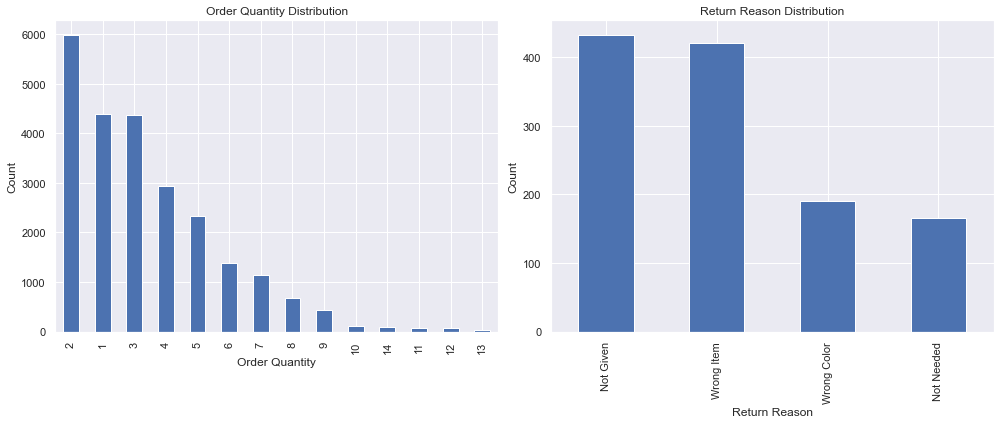

<IPython.core.display.Javascript object>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Setting up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the counts for orders
orders_1["Orders_Quantity"].value_counts().sort_values(ascending=False).plot(ax=axes[0], kind='bar', title='Order Quantity Distribution')
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('Count')

# Plotting the counts for returns
returns_1["Reason_Returned"].value_counts().sort_values(ascending=False).plot(ax=axes[1], kind='bar', title='Return Reason Distribution')
axes[1].set_xlabel('Return Reason')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Univariate Box Plots<br>Univariate Bar Plots<br>Categorical Bar Plots</h3>


In [39]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [40]:
def categorical_plot(data, feature, perc=True, figsize=(10, 5)):
    """
    Bar plot for categorical data

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    """
    plt.figure(figsize=figsize)
    
    # Find the order of categories based on their counts
    order = data[feature].value_counts().index
    
    ax = sns.countplot(data=data, x=feature, palette='Paired', order=order)
    plt.title('Bar plot for ' + feature)
    
    # Set the rotation of the x-axis labels
    plt.xticks(rotation=45)

    # Total number of data points
    total = float(len(data))
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(label, (x, y), size = 12)
    
    plt.show()


<IPython.core.display.Javascript object>

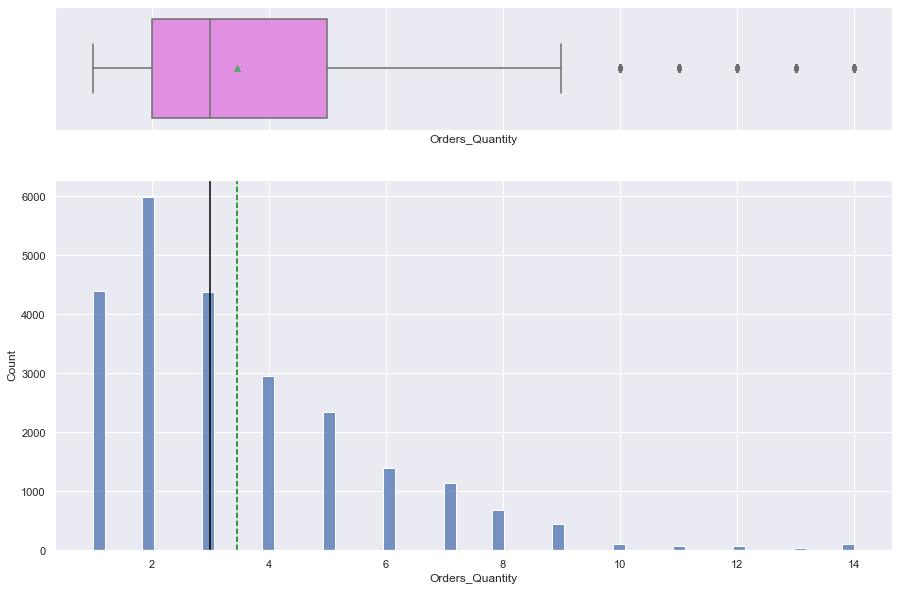

<IPython.core.display.Javascript object>

In [41]:
# POSSIBLE ORDERS TARGET VARIABLE
histogram_boxplot(orders_1, "Orders_Quantity")

In [42]:
orders_1["Orders_Quantity"].describe()

count    24059.000000
mean         3.459371
std          2.288170
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Orders_Quantity, dtype: float64

<IPython.core.display.Javascript object>

In [43]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Orders_Quantity"].quantile(0.25)
Q3 = orders_1["Orders_Quantity"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
orders_quantity_outliers = orders_1[
    (orders_1["Orders_Quantity"] < lower_limit)
    | (orders_1["Orders_Quantity"] > upper_limit)
]
orders_quantity_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
74,AG-2019-3960042,AG-2019,3960042,2019-04-11,Thursday,April,2019-04-16,Same Day,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,0.00,0.000000,12,0.05,0,1488,46203,Indianapolis,Indiana,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
107,AG-2019-5829085,AG-2019,5829085,2019-03-30,Saturday,March,2019-03-30,Same Day,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,0.00,0.000000,12,0.05,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
119,AG-2019-8240,AG-2019,8240,2019-03-12,Tuesday,March,2019-03-16,Standard Class,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,51.84,0.397790,12,0.00,0,1488,76106,Fort Worth,Texas,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
434,CA-2019-1103846,CA-2019,1103846,2019-04-07,Sunday,April,2019-04-08,Second Class,OFF-BI-10001294,Office Supplies,Binders,Fellowes Binding Cases,9.36,121.68,0.29,0.002383,13,0.35,1,1488,53711,Madison,Wisconsin,Central United States,Annelise Williams,MS-17365,Maribeth Schnelling,Consumer
487,CA-2019-1170997,CA-2019,1170997,2019-11-08,Friday,November,2019-11-10,Standard Class,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",25.98,254.60,0.33,0.001296,14,0.40,1,1488,53711,Madison,Wisconsin,Central United States,Annelise Williams,SN-20710,Steve Nguyen,Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035,ZI-2019-3598234,ZI-2019,3598234,2019-06-04,Tuesday,June,2019-06-05,Standard Class,FUR-HAR-10002178,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",44.80,627.23,0.14,0.000223,14,0.20,0,1488,50322,Urbandale,Iowa,Central United States,Annelise Williams,JB-6045,Julia Barnett,Home Office
24041,ZI-2019-4634021,ZI-2019,4634021,2019-11-21,Thursday,November,2019-11-22,Second Class,OFF-CAR-10000150,Office Supplies,Binders,"Cardinal Binder, Clear",13.29,39.87,0.10,0.002508,10,0.15,0,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,EM-3810,Eleni McCrary,Corporate
24048,ZI-2019-5627243,ZI-2019,5627243,2019-06-28,Friday,June,2019-07-03,Standard Class,FUR-HAR-10002178,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",44.80,627.23,0.14,0.000223,14,0.20,0,1488,76106,Fort Worth,Texas,Central United States,Annelise Williams,JB-6045,Julia Barnett,Home Office
24057,ZI-2019-918281,ZI-2019,918281,2019-10-05,Saturday,October,2019-10-06,Second Class,OFF-CAR-10000150,Office Supplies,Binders,"Cardinal Binder, Clear",13.29,39.87,0.10,0.002508,10,0.15,0,1488,55901,Rochester,Minnesota,Central United States,Annelise Williams,EM-3810,Eleni McCrary,Corporate


<IPython.core.display.Javascript object>

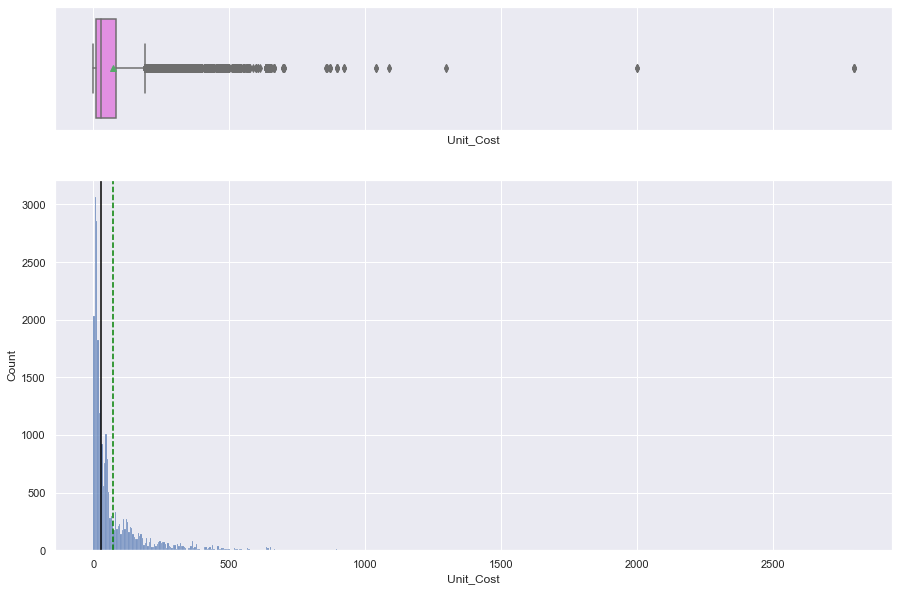

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(orders_1, "Unit_Cost")

In [45]:
orders_1["Unit_Cost"].describe()

count    24059.000000
mean        72.358879
std        116.149196
min          0.420000
25%         11.600000
50%         29.490000
75%         83.310000
max       2799.990000
Name: Unit_Cost, dtype: float64

<IPython.core.display.Javascript object>

In [46]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Unit_Cost"].quantile(0.25)
Q3 = orders_1["Unit_Cost"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
unit_cost_outliers = orders_1[
    (orders_1["Unit_Cost"] < lower_limit) | (orders_1["Unit_Cost"] > upper_limit)
]
unit_cost_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
6,AE-2019-3323423,AE-2019,3323423,2019-12-06,Friday,December,2019-12-11,Second Class,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",197.91,59.37,0.28,0.004716,1,0.35,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
7,AE-2019-3371820,AE-2019,3371820,2019-12-26,Thursday,December,2019-12-31,Second Class,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",197.91,59.37,0.28,0.004716,1,0.35,1,1488,49505,Grand Rapids,Michigan,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
14,AE-2019-4984367,AE-2019,4984367,2019-12-10,Tuesday,December,2019-12-11,Second Class,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",197.91,59.37,0.28,0.004716,1,0.35,1,1488,48310,Sterling Heights,Michigan,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
18,AE-2019-5941050,AE-2019,5941050,2019-11-27,Wednesday,November,2019-11-30,Second Class,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",197.91,59.37,0.28,0.004716,1,0.35,1,1488,62301,Quincy,Illinois,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
28,AG-2019-1366085,AG-2019,1366085,2019-10-16,Wednesday,October,2019-10-21,Standard Class,TEC-SHA-10000052,Technology,Copiers,"Sharp Copy Machine, Color",240.84,481.68,0.19,0.000394,2,0.25,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,CC-2100,Chad Cunningham,Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,ZA-2019-1150107,ZA-2019,1150107,2019-03-07,Thursday,March,2019-03-10,Standard Class,TEC-HEW-10002304,Technology,Copiers,"Hewlett Fax Machine, High-Speed",318.12,318.12,0.19,0.000597,1,0.25,0,1488,78207,San Antonio,Texas,Central United States,Annelise Williams,SW-10350,Sean Wendt,Home Office
23971,ZA-2019-210160,ZA-2019,210160,2019-09-05,Thursday,September,2019-09-06,Standard Class,FUR-IKE-10002894,Furniture,Bookcases,"Ikea Library with Doors, Traditional",363.39,2180.34,0.19,0.000087,6,0.25,0,1488,78041,Laredo,Texas,Central United States,Annelise Williams,DB-3615,Doug Bickford,Consumer
23989,ZA-2019-4317871,ZA-2019,4317871,2019-08-22,Thursday,August,2019-08-23,Standard Class,FUR-IKE-10002894,Furniture,Bookcases,"Ikea Library with Doors, Traditional",363.39,2180.34,0.19,0.000087,6,0.25,0,1488,75051,Grand Prairie,Texas,Central United States,Annelise Williams,DB-3615,Doug Bickford,Consumer
23992,ZA-2019-4735037,ZA-2019,4735037,2019-02-23,Saturday,February,2019-02-25,Standard Class,TEC-HEW-10002304,Technology,Copiers,"Hewlett Fax Machine, High-Speed",318.12,318.12,0.19,0.000597,1,0.25,0,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,SW-10350,Sean Wendt,Home Office


<IPython.core.display.Javascript object>

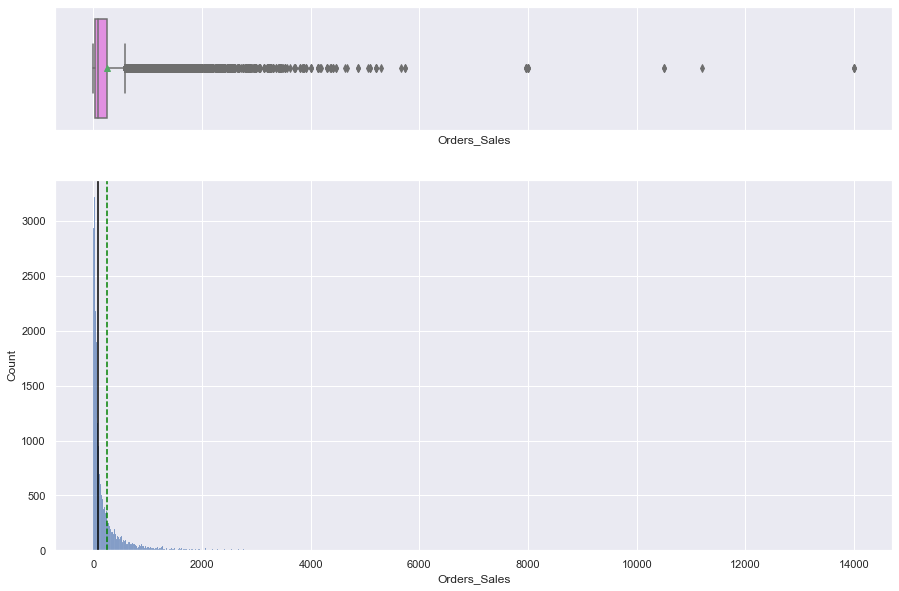

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(orders_1, "Orders_Sales")

In [48]:
orders_1["Orders_Sales"].describe()

count    24059.000000
mean       248.107230
std        502.412675
min          0.440000
25%         29.910000
50%         83.880000
75%        248.150000
max      13999.960000
Name: Orders_Sales, dtype: float64

<IPython.core.display.Javascript object>

In [49]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Orders_Sales"].quantile(0.25)
Q3 = orders_1["Orders_Sales"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
orders_sales_outliers = orders_1[
    (orders_1["Orders_Sales"] < lower_limit) | (orders_1["Orders_Sales"] > upper_limit)
]
orders_sales_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
29,AG-2019-1400544,AG-2019,1400544,2019-01-29,Tuesday,January,2019-01-29,Standard Class,FUR-SAU-10002255,Furniture,Bookcases,"Sauder Classic Bookcase, Pine",437.34,874.68,0.19,0.000217,2,0.25,0,1488,47374,Richmond,Indiana,Central United States,Annelise Williams,SB-10170,Sarah Bern,Consumer
44,AG-2019-2384745,AG-2019,2384745,2019-05-12,Sunday,May,2019-05-16,Standard Class,OFF-KIT-10001791,Office Supplies,Appliances,"KitchenAid Refrigerator, White",526.08,1052.16,0.28,0.000266,2,0.35,1,1488,68104,Omaha,Nebraska,Central United States,Annelise Williams,CL-2565,Clay Ludtke,Consumer
57,AG-2019-3236544,AG-2019,3236544,2019-11-09,Saturday,November,2019-11-10,Standard Class,TEC-BRO-10004178,Technology,Copiers,"Brother Wireless Fax, Laser",378.81,1515.24,0.19,0.000125,4,0.25,0,1488,79907,El Paso,Texas,Central United States,Annelise Williams,RD-9660,Robert Dilbeck,Home Office
62,AG-2019-3495968,AG-2019,3495968,2019-12-21,Saturday,December,2019-12-22,Standard Class,TEC-BRO-10004178,Technology,Copiers,"Brother Wireless Fax, Laser",378.81,1515.24,0.19,0.000125,4,0.25,0,1488,55113,Saint Paul,Minnesota,Central United States,Annelise Williams,RD-9660,Robert Dilbeck,Home Office
78,AG-2019-4211735,AG-2019,4211735,2019-02-02,Saturday,February,2019-02-03,Standard Class,FUR-SAU-10002255,Furniture,Bookcases,"Sauder Classic Bookcase, Pine",437.34,874.68,0.19,0.000217,2,0.25,0,1488,75220,Dallas,Texas,Central United States,Annelise Williams,SB-10170,Sarah Bern,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23948,WA-2019-997665,WA-2019,997665,2019-07-11,Thursday,July,2019-07-11,Second Class,TEC-MEM-10002005,Technology,Accessories,"Memorex Router, Erganomic",244.02,1464.12,0.00,0.000000,6,0.05,0,1488,76051,Grapevine,Texas,Central United States,Annelise Williams,TB-11520,Tracy Blumstein,Consumer
23971,ZA-2019-210160,ZA-2019,210160,2019-09-05,Thursday,September,2019-09-06,Standard Class,FUR-IKE-10002894,Furniture,Bookcases,"Ikea Library with Doors, Traditional",363.39,2180.34,0.19,0.000087,6,0.25,0,1488,78041,Laredo,Texas,Central United States,Annelise Williams,DB-3615,Doug Bickford,Consumer
23989,ZA-2019-4317871,ZA-2019,4317871,2019-08-22,Thursday,August,2019-08-23,Standard Class,FUR-IKE-10002894,Furniture,Bookcases,"Ikea Library with Doors, Traditional",363.39,2180.34,0.19,0.000087,6,0.25,0,1488,75051,Grand Prairie,Texas,Central United States,Annelise Williams,DB-3615,Doug Bickford,Consumer
24035,ZI-2019-3598234,ZI-2019,3598234,2019-06-04,Tuesday,June,2019-06-05,Standard Class,FUR-HAR-10002178,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",44.80,627.23,0.14,0.000223,14,0.20,0,1488,50322,Urbandale,Iowa,Central United States,Annelise Williams,JB-6045,Julia Barnett,Home Office


<IPython.core.display.Javascript object>

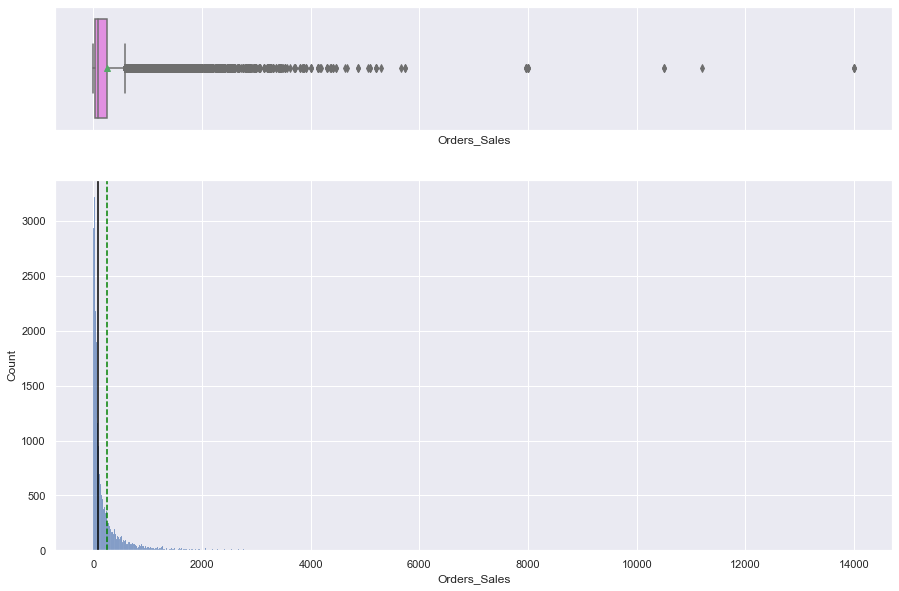

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(orders_1, "Orders_Sales")

In [51]:
orders_1["Orders_Profit"].describe()

count    24059.000000
mean         0.966315
std         38.730353
min      -3839.990000
25%          0.100000
50%          0.190000
75%          0.290000
max       1439.450000
Name: Orders_Profit, dtype: float64

<IPython.core.display.Javascript object>

In [52]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Orders_Profit"].quantile(0.25)
Q3 = orders_1["Orders_Profit"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
orders_profit_outliers = orders_1[
    (orders_1["Orders_Profit"] < lower_limit)
    | (orders_1["Orders_Profit"] > upper_limit)
]
orders_profit_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
79,AG-2019-4280,AG-2019,4280,2019-12-04,Wednesday,December,2019-12-10,Standard Class,OFF-BOS-10004950,Office Supplies,Art,"Boston Pens, Fluorescent",15.48,92.88,15.66,0.168605,6,0.10,0,1488,73120,Oklahoma City,Oklahoma,Central United States,Annelise Williams,RD-9660,Robert Dilbeck,Home Office
89,AG-2019-4840,AG-2019,4840,2019-08-20,Tuesday,August,2019-08-25,Standard Class,TEC-MEM-10002524,Technology,Accessories,"Memorex Mouse, USB",11.35,56.76,10.74,0.189218,2,0.00,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,CD-2790,Cynthia Delaney,Home Office
112,AG-2019-6310,AG-2019,6310,2019-01-24,Thursday,January,2019-01-30,Standard Class,FUR-RUB-10002817,Furniture,Furnishings,"Rubbermaid Door Stop, Durable",40.83,40.83,5.28,0.129317,1,0.05,0,1488,46060,Noblesville,Indiana,Central United States,Annelise Williams,JG-5160,James Galang,Consumer
119,AG-2019-8240,AG-2019,8240,2019-03-12,Tuesday,March,2019-03-16,Standard Class,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,51.84,0.397790,12,0.00,0,1488,76106,Fort Worth,Texas,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
132,AJ-2019-5740,AJ-2019,5740,2019-10-23,Wednesday,October,2019-10-28,Standard Class,OFF-NOV-10000141,Office Supplies,Labels,"Novimex Round Labels, 5000 Label Set",6.66,13.32,6.24,0.468468,2,0.25,0,1488,74133,Tulsa,Oklahoma,Central United States,Annelise Williams,LW-6825,Laurel Workman,Corporate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22192,US-2019-167402,US-2019,167402,2019-01-14,Monday,January,2019-01-19,Second Class,OFF-PA-10004983,Office Supplies,Paper,Xerox 23,6.48,32.40,15.55,0.479938,5,0.20,0,1488,75220,Dallas,Texas,Central United States,Annelise Williams,CP-12085,Cathy Prescott,Corporate
22198,US-2019-168116,US-2019,168116,2019-11-05,Tuesday,November,2019-11-05,Same Day,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,1999.99,7999.98,-3839.99,-0.480000,4,0.25,0,1488,77095,Houston,Texas,Central United States,Annelise Williams,GT-14635,Grant Thornton,Corporate
22199,US-2019-168200,US-2019,168200,2019-09-29,Sunday,September,2019-10-03,Standard Class,FUR-FU-10002630,Furniture,Furnishings,"Tenex Clock, Erganomic",32.58,78.19,-14.37,-0.183783,4,0.05,0,1488,76903,San Angelo,Texas,Central United States,Annelise Williams,RB-19795,Ross Baird,Home Office
22204,US-2019-168998,US-2019,168998,2019-06-05,Wednesday,June,2019-06-09,Standard Class,OFF-SU-10000378,Office Supplies,Supplies,"Kleencut Scissors, High Speed",11.89,35.66,-2.68,-0.075154,3,0.05,0,1488,68104,Omaha,Nebraska,Central United States,Annelise Williams,JB-15925,Joni Blumstein,Consumer


<IPython.core.display.Javascript object>

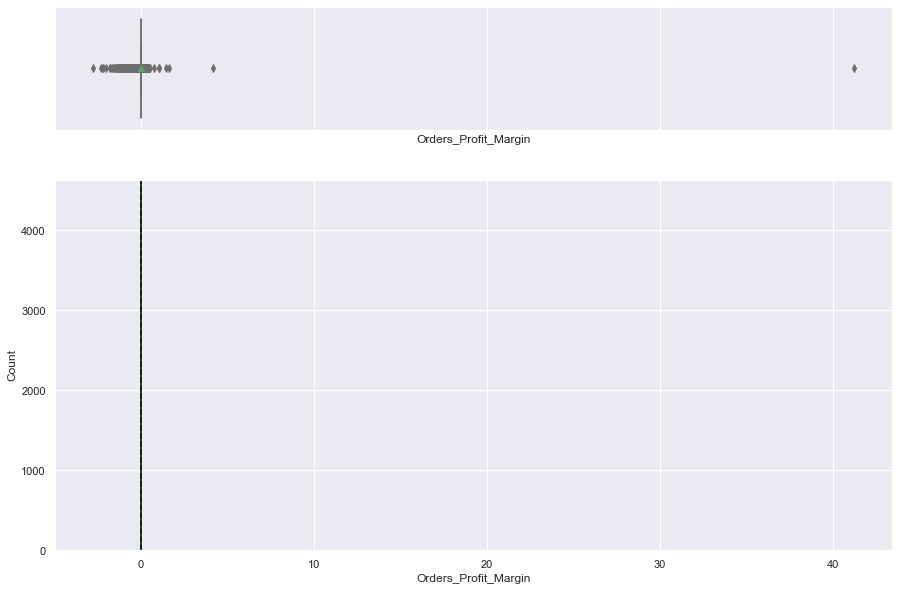

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(orders_1, "Orders_Profit_Margin")

In [54]:
orders_1["Orders_Profit_Margin"].describe()

count    24059.000000
mean         0.008545
std          0.280356
min         -2.747212
25%          0.000414
50%          0.001584
75%          0.005541
max         41.245383
Name: Orders_Profit_Margin, dtype: float64

<IPython.core.display.Javascript object>

In [55]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Orders_Profit_Margin"].quantile(0.25)
Q3 = orders_1["Orders_Profit_Margin"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
orders_profit_margin_outliers = orders_1[
    (orders_1["Orders_Profit_Margin"] < lower_limit)
    | (orders_1["Orders_Profit_Margin"] > upper_limit)
]
orders_profit_margin_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
1,AE-2019-1263608,AE-2019,1263608,2019-12-26,Thursday,December,2019-12-31,Second Class,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",11.43,3.43,0.33,0.096210,1,0.40,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,GH-4665,Greg Hansen,Consumer
8,AE-2019-350473,AE-2019,350473,2019-03-25,Monday,March,2019-03-29,Same Day,OFF-HON-10004621,Office Supplies,Labels,"Hon Color Coded Labels, Adjustable",10.71,6.43,0.24,0.037325,2,0.30,1,1488,78577,Pharr,Texas,Central United States,Annelise Williams,JD-5790,John Dryer,Consumer
9,AE-2019-4073208,AE-2019,4073208,2019-01-13,Sunday,January,2019-01-18,Second Class,OFF-TEN-10002817,Office Supplies,Storage,"Tenex Folders, Blue",23.22,6.97,0.28,0.040172,1,0.35,1,1488,52402,Cedar Rapids,Iowa,Central United States,Annelise Williams,MY-7380,Maribeth Yedwab,Corporate
10,AE-2019-4135578,AE-2019,4135578,2019-03-22,Friday,March,2019-03-23,Same Day,OFF-HON-10004621,Office Supplies,Labels,"Hon Color Coded Labels, Adjustable",10.71,6.43,0.24,0.037325,2,0.30,1,1488,78745,Austin,Texas,Central United States,Annelise Williams,JD-5790,John Dryer,Consumer
11,AE-2019-4220600,AE-2019,4220600,2019-03-24,Sunday,March,2019-03-26,Same Day,OFF-HON-10004621,Office Supplies,Labels,"Hon Color Coded Labels, Adjustable",10.71,6.43,0.24,0.037325,2,0.30,1,1488,77095,Houston,Texas,Central United States,Annelise Williams,JD-5790,John Dryer,Consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,ZI-2019-3444106,ZI-2019,3444106,2019-10-27,Sunday,October,2019-10-30,Second Class,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1.20,0.10,0.083333,1,0.15,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,NG-8430,Nathan Gelder,Consumer
24037,ZI-2019-4045433,ZI-2019,4045433,2019-11-11,Monday,November,2019-11-13,Standard Class,TEC-OKI-10001433,Technology,Machines,"Okidata Calculator, Red",14.83,14.83,0.24,0.016183,1,0.30,1,1488,75220,Dallas,Texas,Central United States,Annelise Williams,NG-8430,Nathan Gelder,Consumer
24042,ZI-2019-4755244,ZI-2019,4755244,2019-09-24,Tuesday,September,2019-09-28,Second Class,OFF-WIL-10001889,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Economy",4.53,1.36,0.10,0.073529,1,0.15,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,AP-720,Anne Pryor,Home Office
24046,ZI-2019-5469188,ZI-2019,5469188,2019-10-26,Saturday,October,2019-10-31,Second Class,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1.20,0.10,0.083333,1,0.15,0,1488,78207,San Antonio,Texas,Central United States,Annelise Williams,NG-8430,Nathan Gelder,Consumer


<IPython.core.display.Javascript object>

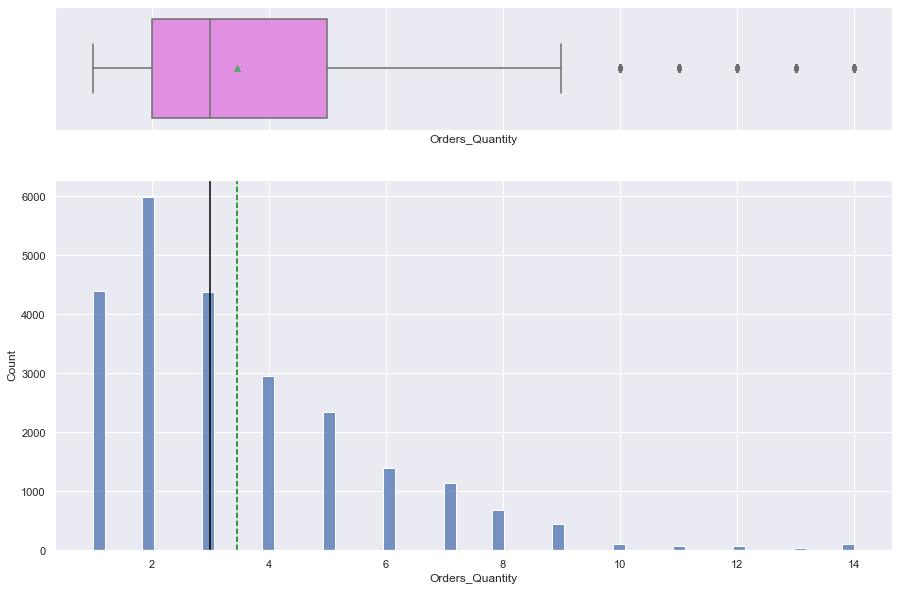

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(orders_1, "Orders_Quantity")

In [57]:
orders_1["Orders_Quantity"].describe()

count    24059.000000
mean         3.459371
std          2.288170
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Orders_Quantity, dtype: float64

<IPython.core.display.Javascript object>

In [58]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Orders_Quantity"].quantile(0.25)
Q3 = orders_1["Orders_Quantity"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
orders_quantity_outliers = orders_1[
    (orders_1["Orders_Quantity"] < lower_limit)
    | (orders_1["Orders_Quantity"] > upper_limit)
]
orders_quantity_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
74,AG-2019-3960042,AG-2019,3960042,2019-04-11,Thursday,April,2019-04-16,Same Day,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,0.00,0.000000,12,0.05,0,1488,46203,Indianapolis,Indiana,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
107,AG-2019-5829085,AG-2019,5829085,2019-03-30,Saturday,March,2019-03-30,Same Day,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,0.00,0.000000,12,0.05,0,1488,48234,Detroit,Michigan,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
119,AG-2019-8240,AG-2019,8240,2019-03-12,Tuesday,March,2019-03-16,Standard Class,OFF-ADV-10004875,Office Supplies,Fasteners,"Advantus Staples, Bulk Pack",10.86,130.32,51.84,0.397790,12,0.00,0,1488,76106,Fort Worth,Texas,Central United States,Annelise Williams,AR-570,Anemone Ratner,Consumer
434,CA-2019-1103846,CA-2019,1103846,2019-04-07,Sunday,April,2019-04-08,Second Class,OFF-BI-10001294,Office Supplies,Binders,Fellowes Binding Cases,9.36,121.68,0.29,0.002383,13,0.35,1,1488,53711,Madison,Wisconsin,Central United States,Annelise Williams,MS-17365,Maribeth Schnelling,Consumer
487,CA-2019-1170997,CA-2019,1170997,2019-11-08,Friday,November,2019-11-10,Standard Class,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",25.98,254.60,0.33,0.001296,14,0.40,1,1488,53711,Madison,Wisconsin,Central United States,Annelise Williams,SN-20710,Steve Nguyen,Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035,ZI-2019-3598234,ZI-2019,3598234,2019-06-04,Tuesday,June,2019-06-05,Standard Class,FUR-HAR-10002178,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",44.80,627.23,0.14,0.000223,14,0.20,0,1488,50322,Urbandale,Iowa,Central United States,Annelise Williams,JB-6045,Julia Barnett,Home Office
24041,ZI-2019-4634021,ZI-2019,4634021,2019-11-21,Thursday,November,2019-11-22,Second Class,OFF-CAR-10000150,Office Supplies,Binders,"Cardinal Binder, Clear",13.29,39.87,0.10,0.002508,10,0.15,0,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,EM-3810,Eleni McCrary,Corporate
24048,ZI-2019-5627243,ZI-2019,5627243,2019-06-28,Friday,June,2019-07-03,Standard Class,FUR-HAR-10002178,Furniture,Chairs,"Harbour Creations Rocking Chair, Set of Two",44.80,627.23,0.14,0.000223,14,0.20,0,1488,76106,Fort Worth,Texas,Central United States,Annelise Williams,JB-6045,Julia Barnett,Home Office
24057,ZI-2019-918281,ZI-2019,918281,2019-10-05,Saturday,October,2019-10-06,Second Class,OFF-CAR-10000150,Office Supplies,Binders,"Cardinal Binder, Clear",13.29,39.87,0.10,0.002508,10,0.15,0,1488,55901,Rochester,Minnesota,Central United States,Annelise Williams,EM-3810,Eleni McCrary,Corporate


<IPython.core.display.Javascript object>

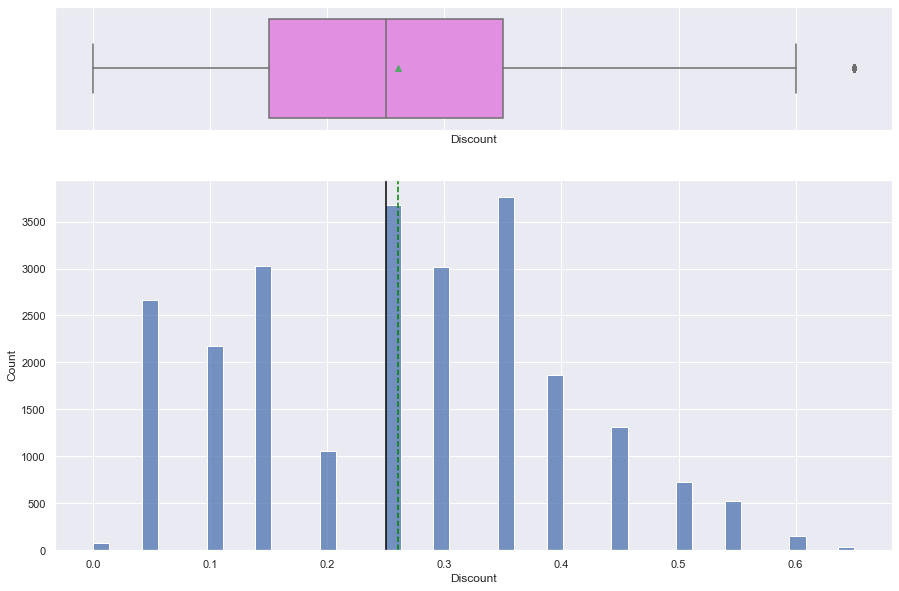

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(orders_1, "Discount")

In [60]:
orders_1["Discount"].describe()

count    24059.000000
mean         0.259932
std          0.136296
min          0.000000
25%          0.150000
50%          0.250000
75%          0.350000
max          0.650000
Name: Discount, dtype: float64

<IPython.core.display.Javascript object>

In [61]:
# Calculate Q1, Q2 and IQR
Q1 = orders_1["Discount"].quantile(0.25)
Q3 = orders_1["Discount"].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the dataframe for outliers
discount_outliers = orders_1[
    (orders_1["Discount"] < lower_limit) | (orders_1["Discount"] > upper_limit)
]
discount_outliers

,Order_ID,Order_Info_ID,Order_ID_Number,Order_Date,Order_Weekday,Order_Month,Ship_Date,Ship_Mode,Product_ID,Orders_Category,Orders_Sub_Category,Product_Name,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount,Discount_Over_30,Region_ID,Postal_Code,City,State,Sub_Region,Salesperson,Customer_ID,Customer_Name,Segment
9140,ID-2019-2515678,ID-2019,2515678,2019-08-04,Sunday,August,2019-08-06,Standard Class,OFF-AP-10001197,Office Supplies,Appliances,"KitchenAid Stove, Red",285.08,285.08,0.57,0.001999,1,0.65,1,1488,75007,Carrollton,Texas,Central United States,Annelise Williams,AG-10495,Andrew Gjertsen,Corporate
9302,ID-2019-305158,ID-2019,305158,2019-07-16,Tuesday,July,2019-07-18,Standard Class,OFF-AP-10001197,Office Supplies,Appliances,"KitchenAid Stove, Red",285.08,285.08,0.57,0.001999,1,0.65,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,AG-10495,Andrew Gjertsen,Corporate
9433,ID-2019-3512470,ID-2019,3512470,2019-08-20,Tuesday,August,2019-08-21,Standard Class,OFF-AP-10000981,Office Supplies,Appliances,"Hoover Coffee Grinder, Red",34.40,68.79,0.57,0.008286,2,0.65,1,1488,60126,Elmhurst,Illinois,Central United States,Annelise Williams,CL-11890,Carl Ludwig,Consumer
9451,ID-2019-3611239,ID-2019,3611239,2019-08-02,Friday,August,2019-08-04,Standard Class,OFF-AP-10000981,Office Supplies,Appliances,"Hoover Coffee Grinder, Red",34.40,68.79,0.57,0.008286,2,0.65,1,1488,77095,Houston,Texas,Central United States,Annelise Williams,CL-11890,Carl Ludwig,Consumer
9510,ID-2019-3817722,ID-2019,3817722,2019-09-15,Sunday,September,2019-09-18,Standard Class,OFF-AP-10000981,Office Supplies,Appliances,"Hoover Coffee Grinder, Red",34.40,68.79,0.57,0.008286,2,0.65,1,1488,61107,Rockford,Illinois,Central United States,Annelise Williams,CL-11890,Carl Ludwig,Consumer
10791,IN-2019-1785602,IN-2019,1785602,2019-08-11,Sunday,August,2019-08-13,Standard Class,OFF-AP-10002090,Office Supplies,Appliances,"Hamilton Beach Refrigerator, Red",415.11,4001.04,0.57,0.000142,8,0.65,1,1488,77803,Bryan,Texas,Central United States,Annelise Williams,CP-12340,Christine Phan,Corporate
10841,IN-2019-185411,IN-2019,185411,2019-07-11,Thursday,July,2019-07-14,Standard Class,OFF-AP-10000004,Office Supplies,Appliances,"Cuisinart Stove, Silver",539.04,539.04,0.57,0.001057,1,0.65,1,1488,64055,Independence,Missouri,Central United States,Annelise Williams,RR-19315,Ralph Ritter,Consumer
10916,IN-2019-1975128,IN-2019,1975128,2019-11-30,Saturday,November,2019-12-03,Standard Class,OFF-AP-10000935,Office Supplies,Appliances,"Cuisinart Toaster, White",46.44,154.80,0.57,0.003682,3,0.65,1,1488,68104,Omaha,Nebraska,Central United States,Annelise Williams,CM-12235,Chris McAfee,Consumer
11073,IN-2019-2234115,IN-2019,2234115,2019-11-14,Thursday,November,2019-11-14,Standard Class,OFF-AP-10000904,Office Supplies,Appliances,"Cuisinart Coffee Grinder, Silver",39.36,118.08,0.57,0.004827,3,0.65,1,1488,60653,Chicago,Illinois,Central United States,Annelise Williams,PS-18760,Pamela Stobb,Consumer
11199,IN-2019-2427050,IN-2019,2427050,2019-07-24,Wednesday,July,2019-07-25,Standard Class,OFF-AP-10000004,Office Supplies,Appliances,"Cuisinart Stove, Silver",539.04,539.04,0.57,0.001057,1,0.65,1,1488,62521,Decatur,Illinois,Central United States,Annelise Williams,RR-19315,Ralph Ritter,Consumer


<IPython.core.display.Javascript object>

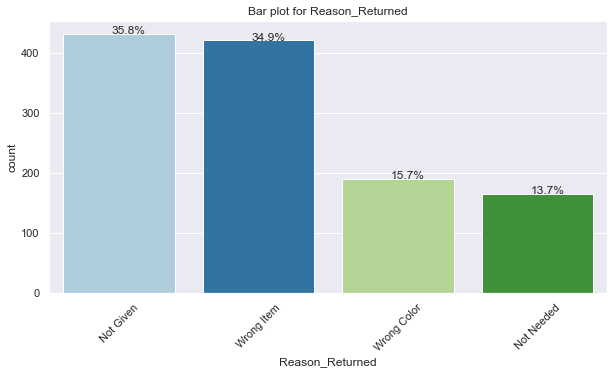

<IPython.core.display.Javascript object>

In [62]:
# POSSIBLE RETURNS TARGET VARIABLE
categorical_plot(returns_1, "Reason_Returned")

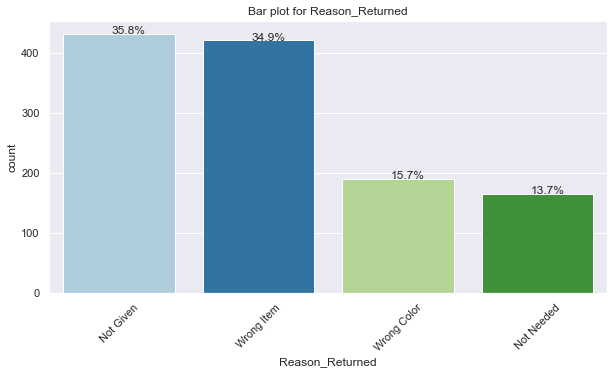

<IPython.core.display.Javascript object>

In [63]:
categorical_plot(returns_1, "Reason_Returned", perc=True)

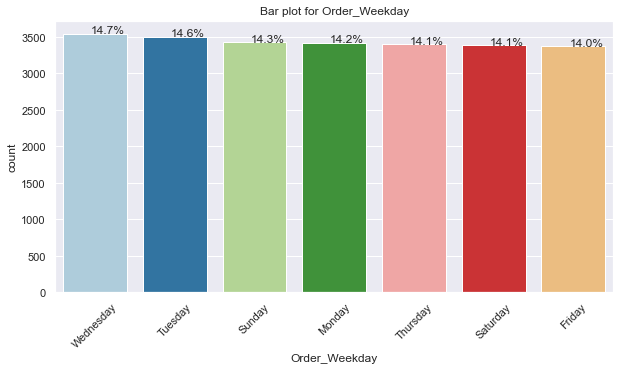

<IPython.core.display.Javascript object>

In [64]:
categorical_plot(orders_1, "Order_Weekday")

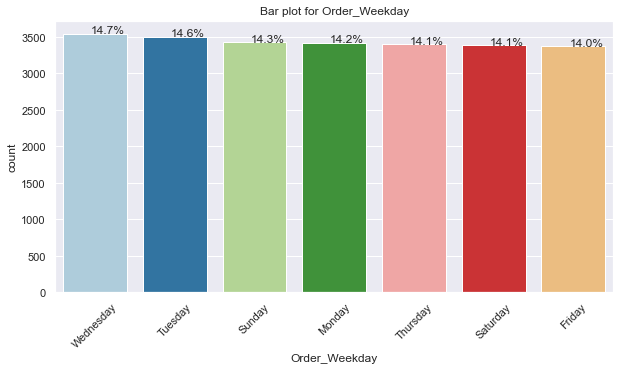

<IPython.core.display.Javascript object>

In [65]:
categorical_plot(orders_1, "Order_Weekday", perc=True)

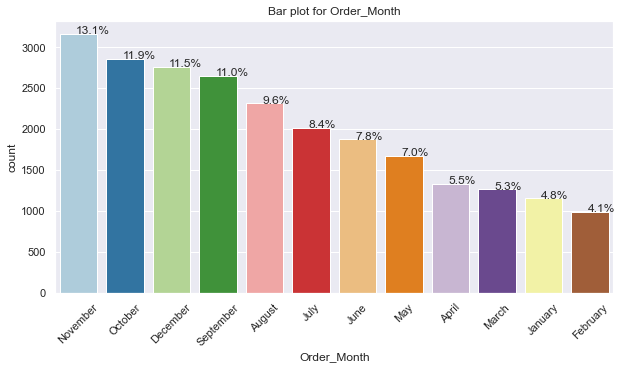

<IPython.core.display.Javascript object>

In [66]:
categorical_plot(orders_1, "Order_Month")

<div style="border-top: 3px solid black"></div>

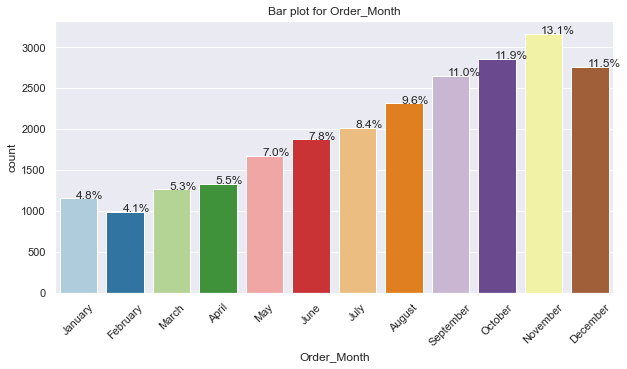

<IPython.core.display.Javascript object>

In [67]:
# ==========================================
# ONLY RUN THIS FUNCTION ON A COPY OF THE DF
# This function will change the origianl df
# ==========================================
def categorical_plot_specific_order_but_this_changes_df(
    data, feature, categories=None, perc=True, figsize=(10, 5)
):
    """
    Bar plot for categorical data

    data: dataframe
    feature: dataframe column
    categories: order of categories (default None)
    figsize: size of figure (default (10,5))
    """
    plt.figure(figsize=figsize)

    # If a specific category order is provided, the data is adjusted accordingly
    if categories:
        data[feature] = pd.Categorical(
            data[feature], categories=categories, ordered=True
        )

    ax = sns.countplot(
        data=data, x=feature, palette="Paired", order=categories
    )  # Capture the axes of the plot here
    plt.title("Bar plot for " + feature)

    # Set the rotation of the x-axis labels
    plt.xticks(rotation=45)

    # Total number of data points
    total = float(len(data))
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(label, (x, y), size=12)

    plt.show()


# Call function on a copy of df

orders_1_copy = orders_1.copy()


month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

categorical_plot_specific_order_but_this_changes_df(
    orders_1_copy, "Order_Month", month_order
)

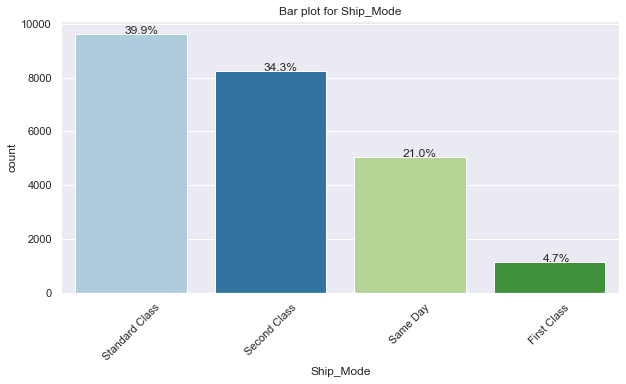

<IPython.core.display.Javascript object>

In [68]:
categorical_plot(orders_1, "Ship_Mode")

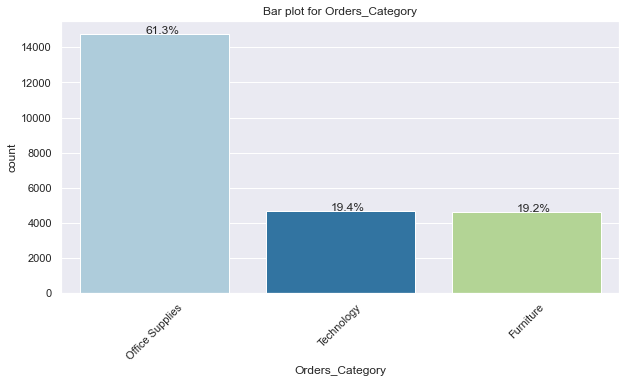

<IPython.core.display.Javascript object>

In [69]:
categorical_plot(orders_1, "Orders_Category")

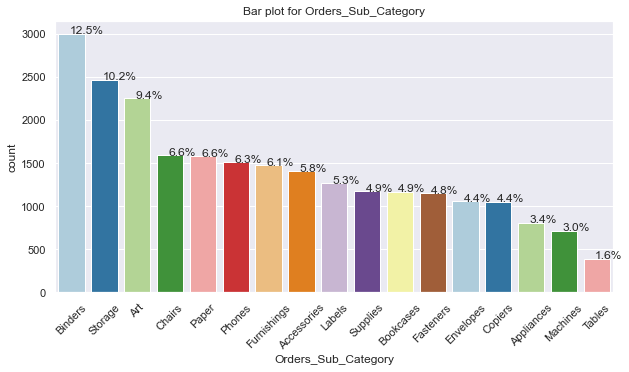

<IPython.core.display.Javascript object>

In [70]:
categorical_plot(orders_1, "Orders_Sub_Category")

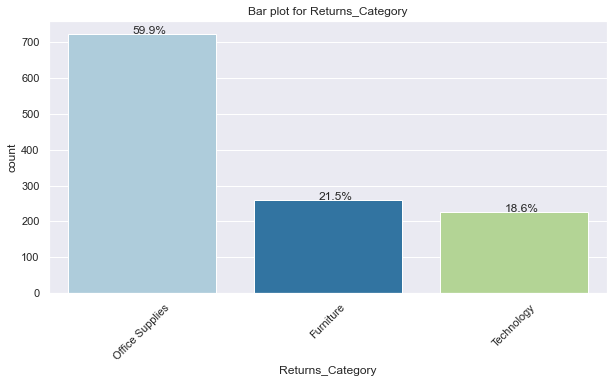

<IPython.core.display.Javascript object>

In [71]:
categorical_plot(returns_1, "Returns_Category")

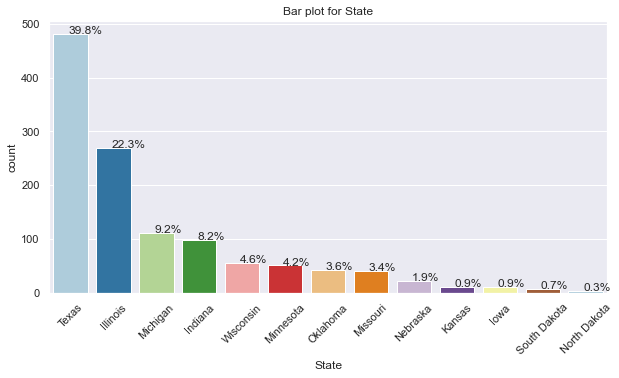

<IPython.core.display.Javascript object>

In [72]:
categorical_plot(returns_1, "State")

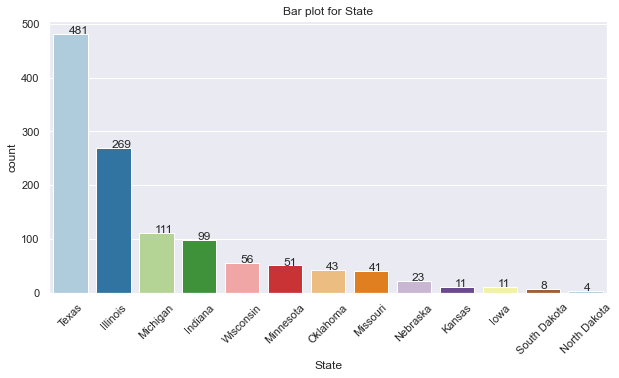

<IPython.core.display.Javascript object>

In [73]:
categorical_plot(returns_1, "State", perc=False)

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Estimator of the Cumulative Distribution Function</h3>

<hr>

<h4 style="color:orange">OBSERVATION</h4>

<p style="font-size:15px">
Here are some example questions that a general audience might be able to answer by looking at each plot:

<ol>
<li><b>Sales Plot:</b> "What percentage of orders with a discount over 30 have total sales less than a specific dollar amount, compared to orders with a discount under 30?"
This plot could help the audience understand how offering a discount over 30 affects the total sales of an order. They could look at a specific dollar amount on the x-axis and compare the corresponding cumulative percentage (y-axis value) for both groups (Discount Over 30 vs Discount Under 30) to see the difference.</li>

<li><b>Profit Plot:</b> "At what profit value do we see that 50% of orders with a discount over 30 have less than that amount, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the profit generated from orders varies based on whether a discount over 30 is offered. They could look for the 0.5 value on the y-axis and compare the corresponding profit values (x-axis value) for both groups.</li>

<li><b>Quantity Plot:</b> "For orders with a discount over 30, what quantity of product is typically ordered, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the quantity of products ordered in a single order might be affected by whether a discount over 30 is offered. They can compare the distributions of both groups to see if there's a noticeable difference.</li>

<li><b>Unit Cost Plot:</b> "What's the maximum unit cost for 90% of orders with a discount over 30, and how does this compare to orders with a discount under 30?"
This plot can help the audience understand how the unit cost of products in orders might be affected by whether a discount over 30 is offered. They could look for the 0.9 value on the y-axis and compare the corresponding unit cost values (x-axis value) for both groups.</li>
</ol>
</p>


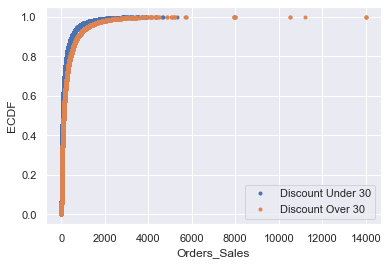

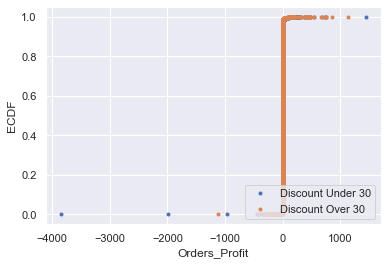

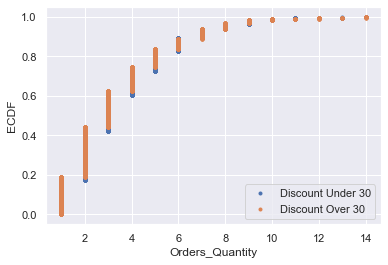

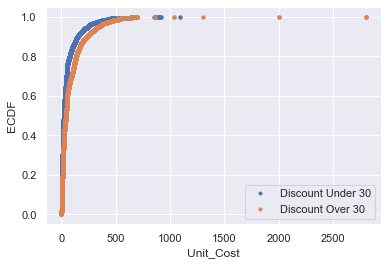

<IPython.core.display.Javascript object>

In [74]:
# compare the distribution of sales when discount_over_30 is 0 or 1. I can do it like this:
# In this code, for the sales feature, it plots two ECDFs - one for the orders which had discount under 30 and 
# one for those which had discount over 30. The x-axis represents the sales and the y-axis represents the 
# cumulative probability.
# can replace sales with any other numeric column of my dataframe to compare their distributions under the 
# two different conditions of discount_over_30.


# visually compare the distributions of the feature for two subsets of the data.
# calculates the ECDF for a given array-like object (such as a pandas Series or a numpy array). 
# It sorts the values in ascending order and assigns a rank to each value that represents the 
# proportion of values that are less than or equal to the current value.
# In the loop provided, it computes the ECDF for two subsets of the data for each specified feature and 
# plots them on the same graph. 

# continuous numeric variables that I could consider for an ECDF plot could be 'profit', 'quantity', or 'unit_cost'. 
# These could provide insights into how these metrics differ between orders with 
# a discount over 30 and those with a discount under 30.

def ecdf(df_arr):
    # number of data points
    n = len(df_arr)
    xvals = np.sort(df_arr)
    yvals = np.arange(1, n + 1) / n
    return xvals, yvals

# Assuming 'Discount_Over_30' is the column in 'orders_1' dataframe which indicates whether the discount is over 30 or not.
for var in ["Orders_Sales", "Orders_Profit", "Orders_Quantity", "Unit_Cost"]:
    tmpx, tmpy = ecdf(orders_1.loc[orders_1["Discount_Over_30"] == 0, var])
    t1, t2 = ecdf(orders_1.loc[orders_1["Discount_Over_30"] == 1, var])
    _ = plt.plot(tmpx, tmpy, marker=".", linestyle="none", label="Discount Under 30")
    _ = plt.plot(t1, t2, marker=".", linestyle="none", label="Discount Over 30")
    _ = plt.legend(("Discount Under 30", "Discount Over 30"), loc="lower right")
    _ = plt.xlabel(var)
    _ = plt.ylabel("ECDF")
    plt.show()



<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Bivariate Pairwise Correlation Matrix</h3>

<hr>

<h4 style="color:orange">ORDERS OBSERVATIONS</h4>

<p style="font-size:15px">
Correlation measures how much two variables move in the same direction. It ranges from -1 to +1. these correlations only measure linear relationships. If the relationship between two variables is not linear, the correlation may not capture it well. Also, correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to change.

<ol>
<li><b>unit_cost and sales:</b>This correlation of 0.769833 means there's a strong positive correlation between unit cost and sales. As the unit cost increases, sales also tend to increase.</li>

<li><b>unit_cost and profit:</b>The correlation of -0.031696 means there's a very weak negative correlation between unit cost and profit. As the unit cost increases, the profit slightly tends to decrease. However, the relationship is weak, and there may be other factors at play.</li>

<li><b>List sales and profit:</b> The correlation of -0.021154 is also a weak negative correlation. It indicates that as sales increase, profit slightly tends to decrease, but again the relationship is weak.</li>

<li><b>profit and profit_margin:</b>The correlation of 0.170439 indicates a weak positive relationship. It means that as profit increases, the profit margin slightly tends to increase.</li>

<li><b>sales and quantity:</b>The correlation of 0.313308 indicates a moderate positive relationship. It means that as sales increase, the quantity also tends to increase.</li>
    
<li><b>unit_cost and discount:</b>The correlation of 0.269118 indicates a weak to moderate positive correlation. It suggests that when the unit cost increases, the discount also tends to increase.</li>

</ol>
</p>

&nbsp;

<h4 style="color:orange">RETURNS OBSERVATIONS</h4>

<p style="font-size:15px">
Correlation measures how much two variables move in the same direction. It ranges from -1 to +1. these correlations only measure linear relationships. If the relationship between two variables is not linear, the correlation may not capture it well. Also, correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other to change.

<ol>
<li><b>Sales and Profit:</b>A correlation of 0.909738 shows a very strong positive correlation. This means that as sales increase, profit also tends to increase in your returns dataset.</li>

<li><b>Sales and Profit Margin:</b>A correlation of 0.235774 is a weak positive correlation. It suggests that as sales increase, the profit margin also tends to increase, but not as strongly as the relationship between sales and profit.</li>

<li><b>Sales and return_quantity:</b> A correlation of 0.031543 is a very weak positive correlation. It suggests that as sales increase, the quantity of returns also slightly increases, but the relationship is quite weak.</li>

<li><b>Profit and Profit Margin:</b>A correlation of 0.404083 is a moderate positive correlation. It suggests that as profit increases, the profit margin also tends to increase.</li>

<li><b>Profit and return_quantity:</b>A correlation of 0.003126 is extremely weak, close to no correlation. It suggests that there is almost no linear relationship between profit and the quantity of returns.</li>
    
<li><b>Profit Margin and return_quantity:</b>A correlation of -0.070811 is a very weak negative correlation. It suggests that as the profit margin increases, the quantity of returns slightly decreases, but the relationship is very weak.</li>

</ol>
</p>


In [75]:
orders_corr = orders_1.copy()
orders_corr.drop(
    ["Order_ID_Number", "Discount_Over_30", "Region_ID", "Postal_Code"],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [76]:
orders_corr.corr()

,Unit_Cost,Orders_Sales,Orders_Profit,Orders_Profit_Margin,Orders_Quantity,Discount
Unit_Cost,1.000000,0.769833,-0.031696,0.000071,-0.012991,0.269118
Orders_Sales,0.769833,1.000000,-0.021154,-0.008192,0.313308,0.218433
Orders_Profit,-0.031696,-0.021154,1.000000,0.170439,0.007189,0.007480
Orders_Profit_Margin,0.000071,-0.008192,0.170439,1.000000,-0.016112,0.006585
Orders_Quantity,-0.012991,0.313308,0.007189,-0.016112,1.000000,-0.009025
Discount,0.269118,0.218433,0.007480,0.006585,-0.009025,1.000000


<IPython.core.display.Javascript object>

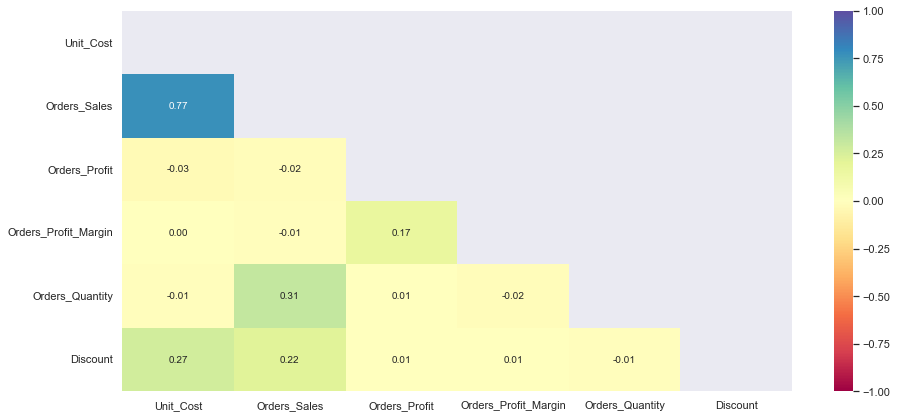

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(15, 7))
corr = orders_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

In [78]:
returns_corr = returns_1.copy()
returns_corr.corr()

,Returns_Sales,Returns_Profit,Returns_Profit_Margin,Return_Quantity
Returns_Sales,1.000000,0.909738,0.235774,0.031543
Returns_Profit,0.909738,1.000000,0.404083,0.003126
Returns_Profit_Margin,0.235774,0.404083,1.000000,-0.070811
Return_Quantity,0.031543,0.003126,-0.070811,1.000000


<IPython.core.display.Javascript object>

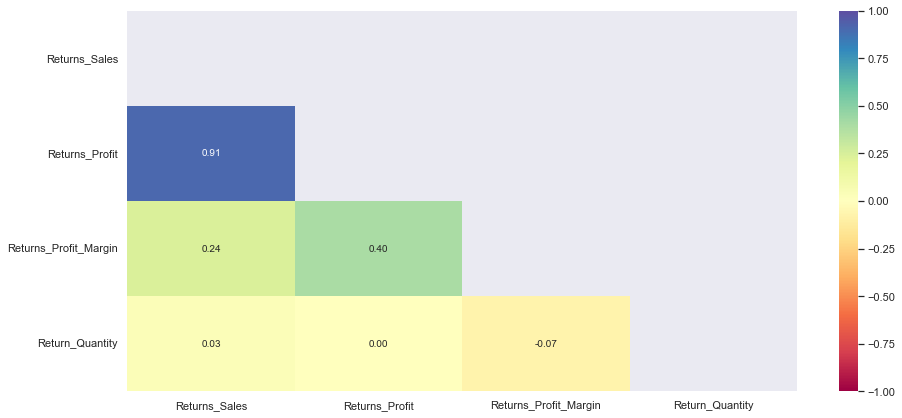

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(15, 7))
corr = returns_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", mask=mask)
plt.show()

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">BIVARIATE PAIRPLOTS</h3>

<hr>

<h4 style="color:orange">ORDERS OBSERVATIONS</h4>

<p style="font-size:15px">
Here is a list of bivariate paring observations:

<ol>
<li><b>sales and profits:</b>Orders with a discount over 30 tend to have higher sales and profit, as seen in the points for discount_over_30 = 1, which are generally higher on the sales vs profit plot.</li>

<li><b>Diagonal Plots::</b>The diagonal plots can show you whether certain values of a variable are more common for orders with a discount over 30. If higher sales values are more common when the discount is over 30, then the distribution would skewe towards the right for discount_over_30 = 1 on the sales vs sales plot.</li>

<li><b>List Item Three:</b> Sentence Three</li>

<li><b>List Item Four:</b>Sentence Four</li>
</ol>
</p>
&nbsp;
<h4 style="color:orange">RETURNS OBSERVATIONS</h4>

<p style="font-size:15px">
Here is a list of ....... looking at each plot:

<ol>
<li><b>Diagonal Plots:</b>The diagonal plots can show you the distribution of each variable. For instance, if most returns have a low 'Profit', the 'Profit' histogram would be skewed towards the right. The diagonal plots can show you the distribution of each variable. For instance, if most returns have a low 'Profit', the 'Profit' histogram would be skewed towards the right.</li>

<li><b>Sales vs. Profit:</b>If 'Sales' and 'Profit' generally increase together, the plot will display a positive correlation in their scatterplot: the points would approximately follow a line going up and to the right. </li>

<li><b>Sales vs return_quantity:</b>  look for unusual patterns or outliers that might warrant further investigation. For instance, if there's a cluster of points far away from the others in the 'Sales' vs 'return_quantity' plot, it could indicate a subset of returns with unusually high sales and return quantities.</li>

<li><b>Sales vs. Profit Margin:</b>If higher 'Sales' correspond with lower 'Profit Margin', you'd see a negative correlation: the points would follow a line going down and to the right.</li>
</ol>
</p>

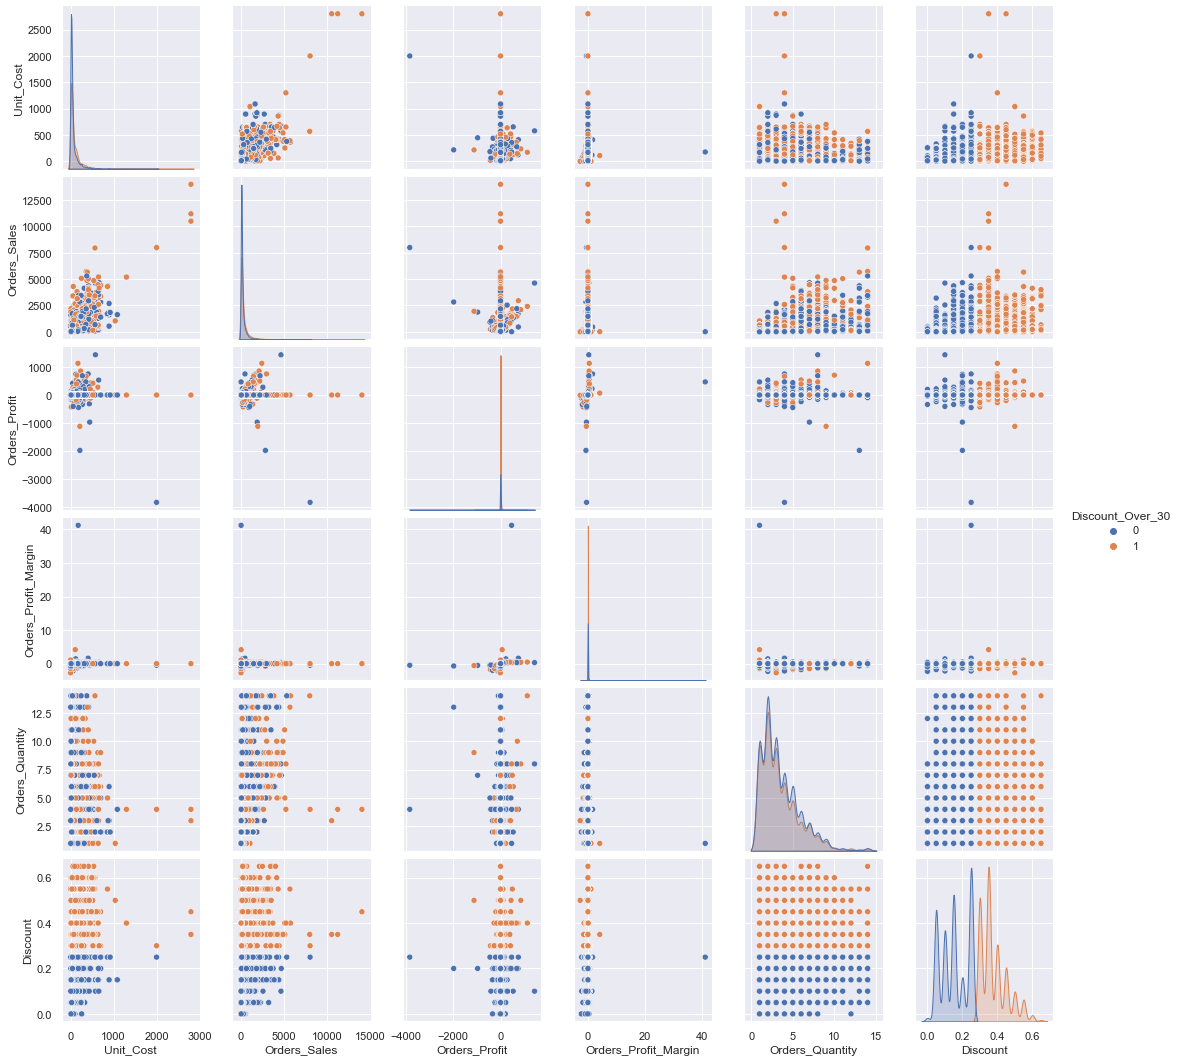

<IPython.core.display.Javascript object>

In [80]:
orders_pairplot = orders_1.copy()
orders_pairplot.drop(
    ["Order_ID_Number", "Region_ID", "Postal_Code"],
    axis=1,
    inplace=True,
)

sns.pairplot(data=orders_pairplot, hue="Discount_Over_30")
plt.show()

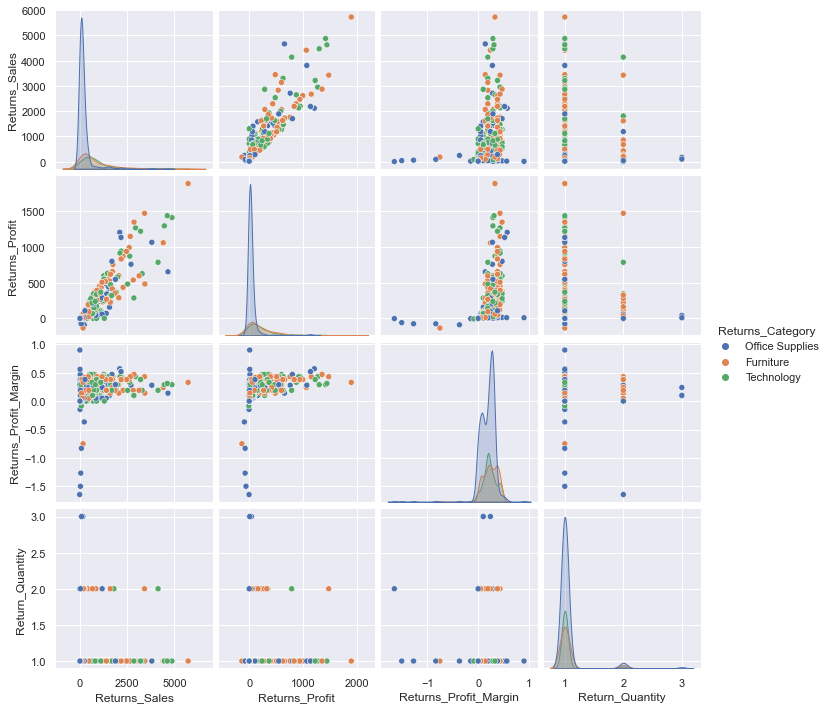

<IPython.core.display.Javascript object>

In [81]:
returns_pairplot = returns_1.copy()

sns.pairplot(data=returns_pairplot, hue="Returns_Category")
plt.show()

<div style="border-top: 3px solid black">

<h3 style="color:blue">Drop Unwanted Features</h3>

In [82]:
orders_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order_ID              24059 non-null  object        
 1   Order_Info_ID         24059 non-null  object        
 2   Order_ID_Number       24059 non-null  int64         
 3   Order_Date            24059 non-null  datetime64[ns]
 4   Order_Weekday         24059 non-null  object        
 5   Order_Month           24059 non-null  object        
 6   Ship_Date             24059 non-null  datetime64[ns]
 7   Ship_Mode             24059 non-null  object        
 8   Product_ID            24059 non-null  object        
 9   Orders_Category       24059 non-null  object        
 10  Orders_Sub_Category   24059 non-null  object        
 11  Product_Name          24059 non-null  object        
 12  Unit_Cost             24059 non-null  float64       
 13  Orders_Sales    

<IPython.core.display.Javascript object>

In [83]:
orders_cleaned = orders_1.drop(["Postal_Code", "Order_ID_Number","Order_Weekday", "Ship_Date","Product_Name","City","Customer_Name","Order_Date", "Order_ID", "Order_Info_ID", "Product_ID", "Customer_ID", "Salesperson", "Sub_Region","Orders_Sub_Category"], axis=1)


<IPython.core.display.Javascript object>

In [84]:
orders_cleaned.nunique()

Order_Month                12
Ship_Mode                   4
Orders_Category             3
Unit_Cost                4247
Orders_Sales             8631
Orders_Profit             720
Orders_Profit_Margin    10711
Orders_Quantity            14
Discount                   14
Discount_Over_30            2
Region_ID                   1
State                      13
Segment                     3
dtype: int64

<IPython.core.display.Javascript object>

In [85]:
# ==============================
# For orders_cleaned DataFrame
orders_categorical_columns = [
    "Order_Month",
    "Ship_Mode",
    "Orders_Category",
    "Segment",
]
for column in orders_categorical_columns:
    print(f"{column}: {orders_cleaned[column].nunique()} unique values")

Order_Month: 12 unique values
Ship_Mode: 4 unique values
Orders_Category: 3 unique values
Segment: 3 unique values


<IPython.core.display.Javascript object>

In [86]:
orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_Month           24059 non-null  object 
 1   Ship_Mode             24059 non-null  object 
 2   Orders_Category       24059 non-null  object 
 3   Unit_Cost             24059 non-null  float64
 4   Orders_Sales          24059 non-null  float64
 5   Orders_Profit         24059 non-null  float64
 6   Orders_Profit_Margin  24059 non-null  float64
 7   Orders_Quantity       24059 non-null  int64  
 8   Discount              24059 non-null  float64
 9   Discount_Over_30      24059 non-null  int64  
 10  Region_ID             24059 non-null  int64  
 11  State                 24059 non-null  object 
 12  Segment               24059 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 2.4+ MB


<IPython.core.display.Javascript object>

In [87]:
returns_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order_ID                 1208 non-null   object        
 1   Return_Date              1208 non-null   datetime64[ns]
 2   Returns_Category         1208 non-null   object        
 3   Returns_Sales            1208 non-null   float64       
 4   Returns_Profit           1208 non-null   float64       
 5   Returns_Profit_Margin    1208 non-null   float64       
 6   Returns_Margin_Category  1208 non-null   object        
 7   State                    1208 non-null   object        
 8   Customer Name            1208 non-null   object        
 9   Return_Quantity          1208 non-null   int64         
 10  Reason_Returned          1208 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 145.5+ KB


<IPython.core.display.Javascript object>

In [88]:
returns_cleaned = returns_1.drop(["Return_Quantity", "Order_ID", "Returns_Margin_Category","Return_Date","Customer Name",], axis=1)


<IPython.core.display.Javascript object>

In [89]:
returns_cleaned.nunique()

Returns_Category           3
Returns_Sales            679
Returns_Profit           643
Returns_Profit_Margin     50
State                     13
Reason_Returned            4
dtype: int64

<IPython.core.display.Javascript object>

In [90]:
# ==============================
# For returns_cleaned DataFrame
returns_categorical_columns = ["Returns_Category", "State", "Reason_Returned"]
for column in returns_categorical_columns:
    print(f"{column}: {returns_cleaned[column].nunique()} unique values")

Returns_Category: 3 unique values
State: 13 unique values
Reason_Returned: 4 unique values


<IPython.core.display.Javascript object>

In [91]:
returns_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order_ID                 1208 non-null   object        
 1   Return_Date              1208 non-null   datetime64[ns]
 2   Returns_Category         1208 non-null   object        
 3   Returns_Sales            1208 non-null   float64       
 4   Returns_Profit           1208 non-null   float64       
 5   Returns_Profit_Margin    1208 non-null   float64       
 6   Returns_Margin_Category  1208 non-null   object        
 7   State                    1208 non-null   object        
 8   Customer Name            1208 non-null   object        
 9   Return_Quantity          1208 non-null   int64         
 10  Reason_Returned          1208 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 145.5+ KB


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>  


<a href='#libraries'>One Hot Encoding</a> 


In [92]:
# For orders_cleaned DataFrame
orders_categorical_columns = ['Order_Month', 'Ship_Mode', 'Orders_Category', 'State', 'Segment']
orders_cleaned = pd.get_dummies(orders_cleaned, columns=orders_categorical_columns)

# For returns_cleaned DataFrame
returns_categorical_columns = ['Returns_Category', 'State', 'Reason_Returned']
returns_cleaned = pd.get_dummies(returns_cleaned, columns=returns_categorical_columns)


<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black">

<h3 style="color:blue">Z-Score<br>Scaled Orders DataFrame<br>Scaled Orders DataFrame</h3>


In [93]:
# Scaling the orders dataset before applying clustering algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

subset = orders_cleaned.copy()
subset_scaled = scaler.fit_transform(subset.select_dtypes(include=[np.number]))

# Creating a dataframe from the scaled data
orders_scaled = pd.DataFrame(
    subset_scaled, columns=subset.select_dtypes(include=[np.number]).columns
)

<IPython.core.display.Javascript object>

In [94]:
# Scaling the returns dataset before applying clustering algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

subset = returns_cleaned.copy()
subset_scaled = scaler.fit_transform(subset.select_dtypes(include=[np.number]))

# Creating a dataframe from the scaled data
returns_scaled = pd.DataFrame(
    subset_scaled, columns=subset.select_dtypes(include=[np.number]).columns
)

<IPython.core.display.Javascript object>

<div style="border-top: 3px solid black"></div>

<h3 style="color:blue">Pickle File<br>Binary Serialization<br>Used to read dataframes in another .ipynb file</h3>

In [95]:
# pickle files are saved in the data folder which is up one level from the jupyter_notebooks folder
# Hence the ../data/
orders_cleaned.to_pickle("../data/orders_cleaned.pkl")
returns_cleaned.to_pickle("../data/returns_cleaned.pkl")
orders_scaled.to_pickle("../data/orders_scaled.pkl")
returns_scaled.to_pickle("../data/returns_scaled.pkl")

<IPython.core.display.Javascript object>

In [97]:
print("Shape of orders_cleaned: ", orders_cleaned.shape)
print("Shape of orders_scaled: ", orders_scaled.shape)
print("Shape of returns_cleaned: ", returns_cleaned.shape)
print("Shape of returns_scaled: ", returns_scaled.shape)

Shape of orders_cleaned:  (24059, 43)
Shape of orders_scaled:  (24059, 43)
Shape of returns_cleaned:  (1208, 23)
Shape of returns_scaled:  (1208, 23)


<IPython.core.display.Javascript object>